In [1]:
from HeaderP import *

In [2]:
"""ztfstars = pd.read_csv('../NewGyroKineage/allGyroAge_GP_kinematic.csv')
ztffeh = pd.read_csv('../StarAgeComp/table-1.csv')
len(ztfstars), len(ztffeh)"""

"ztfstars = pd.read_csv('../NewGyroKineage/allGyroAge_GP_kinematic.csv')\nztffeh = pd.read_csv('../StarAgeComp/table-1.csv')\nlen(ztfstars), len(ztffeh)"

In [3]:
"""ztfstars = pd.merge(ztfstars, ztffeh, left_on='source_id', 
                   right_on='source_id',how='inner')
len(ztfstars)"""

"ztfstars = pd.merge(ztfstars, ztffeh, left_on='source_id', \n                   right_on='source_id',how='inner')\nlen(ztfstars)"

In [4]:
ztfstars = pd.read_pickle('kingmatic_age_mh.pkl')
ztfstars['vr'] = -(ztfstars['x'] * ztfstars['vx'] + ztfstars['y'] * ztfstars['vy'])/ztfstars['R']
ztfstars['vphi'] = -(ztfstars['x'] * ztfstars['vy'] - ztfstars['y'] * ztfstars['vx'])/ztfstars['R']
ztfstars['Rg'] = -ztfstars['Lz']/240

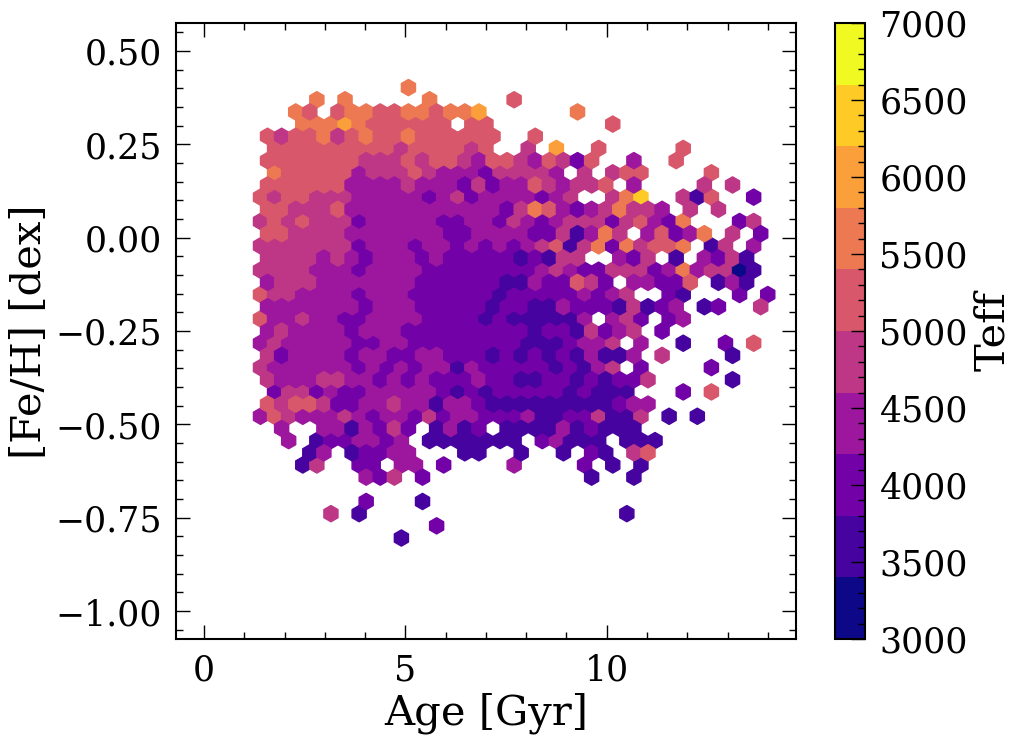

In [37]:

"""plt.hexbin(ztfstars['gyroAge'], ztfstars['mh_xgboost'],
          cmap='binary', mincnt=1, gridsize=40, bins='log',
          extent=(0,14,-1,0.5))
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H] [dex]')"""


plt.figure(figsize=(10,8))
plt.hexbin(ztfstars['gyroAge'], ztfstars['mh_xgboost'],
          cmap=plt.get_cmap('plasma', 10),C=ztfstars['teff_calc'],
           mincnt=1, gridsize=40, vmin=3000, vmax=7000,
          extent=(0,14,-1,0.5))
plt.xlabel('Age [Gyr]')
plt.ylabel('[Fe/H] [dex]')
plt.colorbar(label='Teff')

In [6]:
ztfstars['Rb'] = getRb(ztfstars['gyroAge'], ztfstars['mh_xgboost'])


100%|████████████████████████████████████████████████████████████████████████████████████████████| 27358/27358 [00:00<00:00, 48868.58it/s]


<AxesSubplot:>

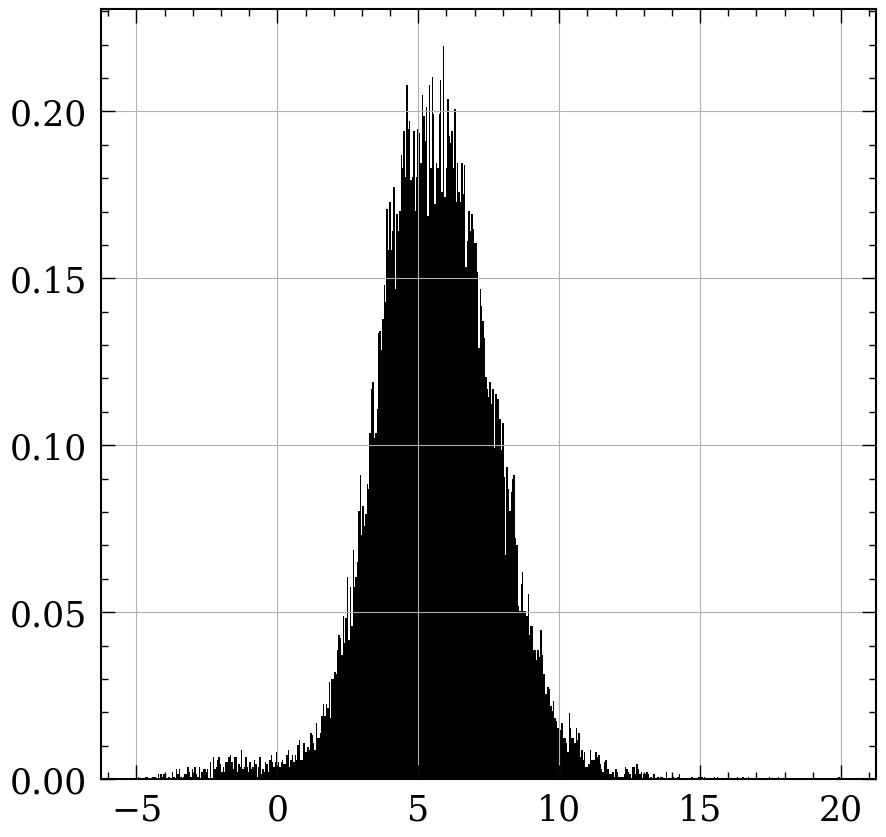

In [7]:
ztfstars['Rb'].hist(bins=np.linspace(-5,20,500), color='k', density=True)
#ztfstars['R'].hist(bins=np.linspace(-5,20,500), color='r', density=True)

(-100.0, 100.0)

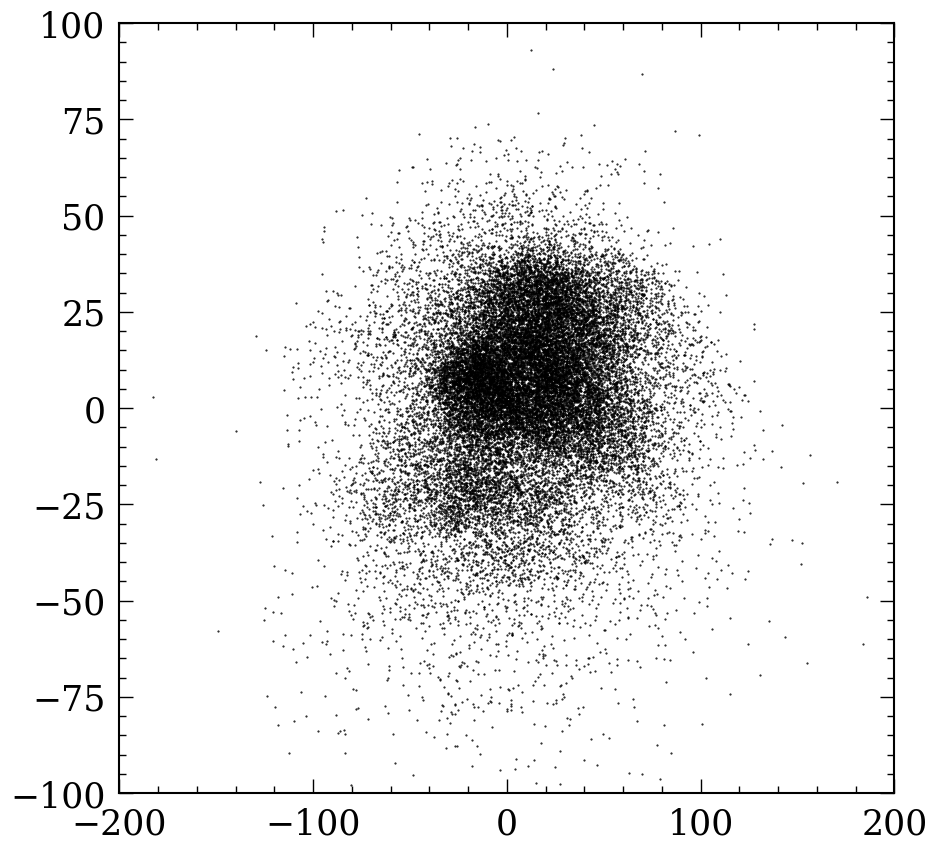

In [8]:
plt.plot(ztfstars['vx'], ztfstars['vy']-220, 'k.', markersize=1)
plt.xlim([-200,200])
plt.ylim([-100,100])

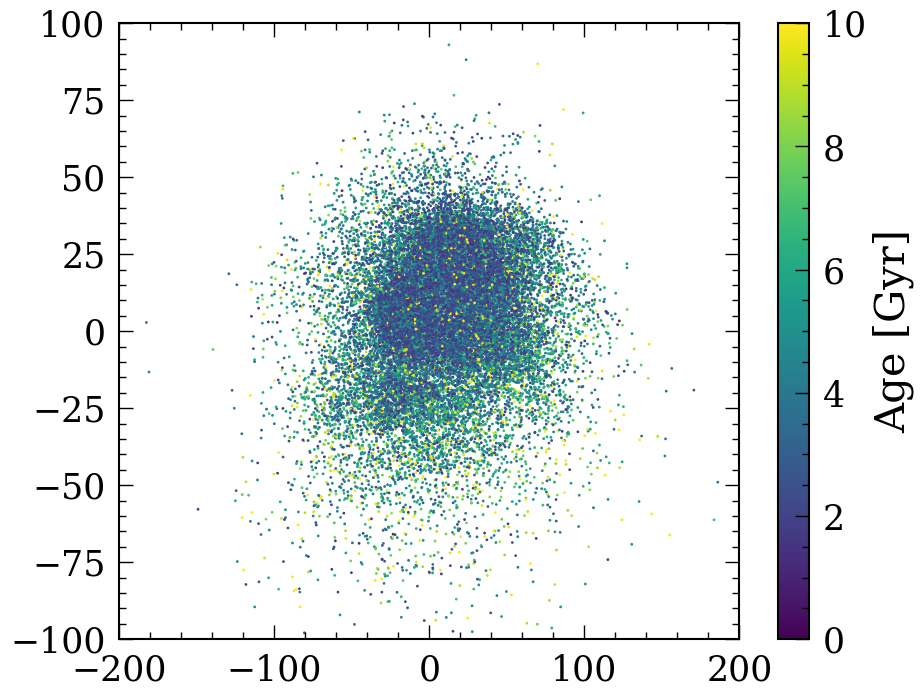

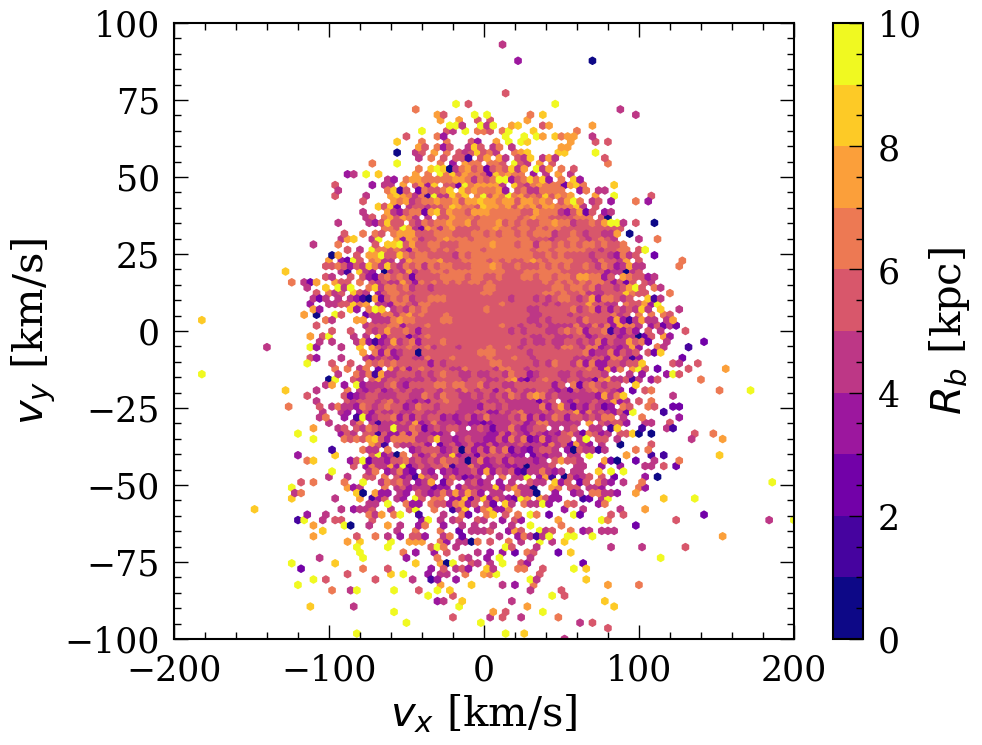

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(ztfstars['vx'], ztfstars['vy']-220, c=ztfstars['gyroAge'], s=1,
           vmin=0, vmax=10)
plt.xlim([-200,200])
plt.ylim([-100,100])
plt.colorbar(label='Age [Gyr]')

plt.figure(figsize=(10,8))
plt.hexbin(ztfstars['vx'], ztfstars['vy']-220, C=ztfstars['Rb'], 
           vmin=0, vmax=10, extent=(-200,200,-100,100),
          cmap=plt.get_cmap('plasma',10))
plt.xlim([-200,200])
plt.ylim([-100,100])
plt.xlabel('$v_x$ [km/s]')
plt.ylabel('$v_y$ [km/s]')
plt.colorbar(label='$R_b$ [kpc]')

20451


Text(0, 0.5, '$v_ϕ$ [km/s]')

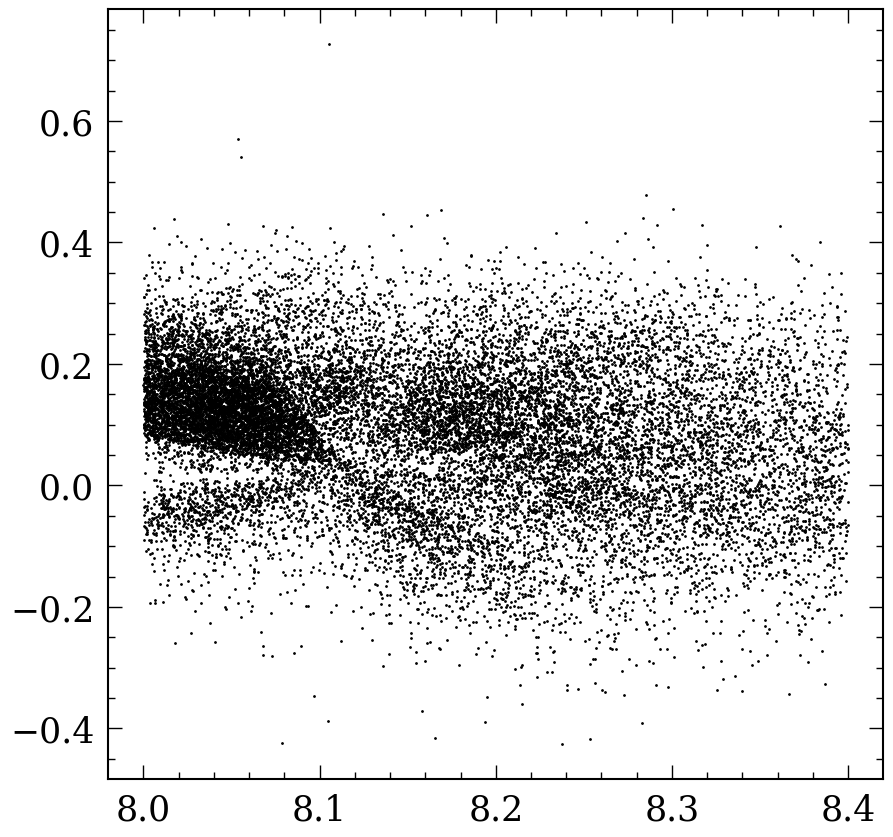

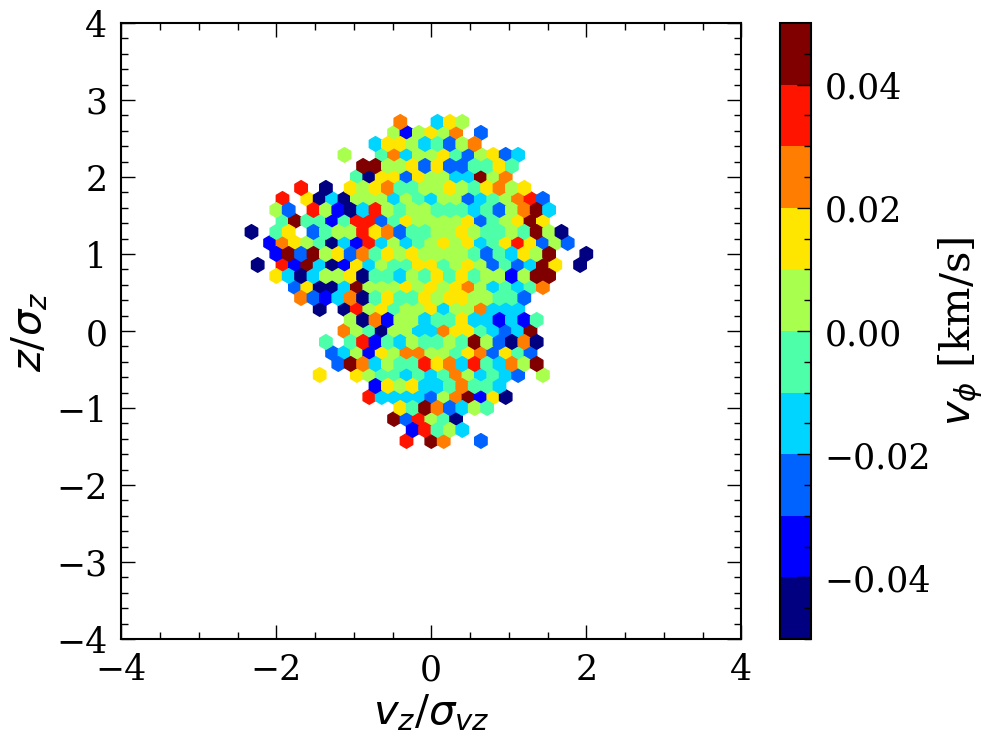

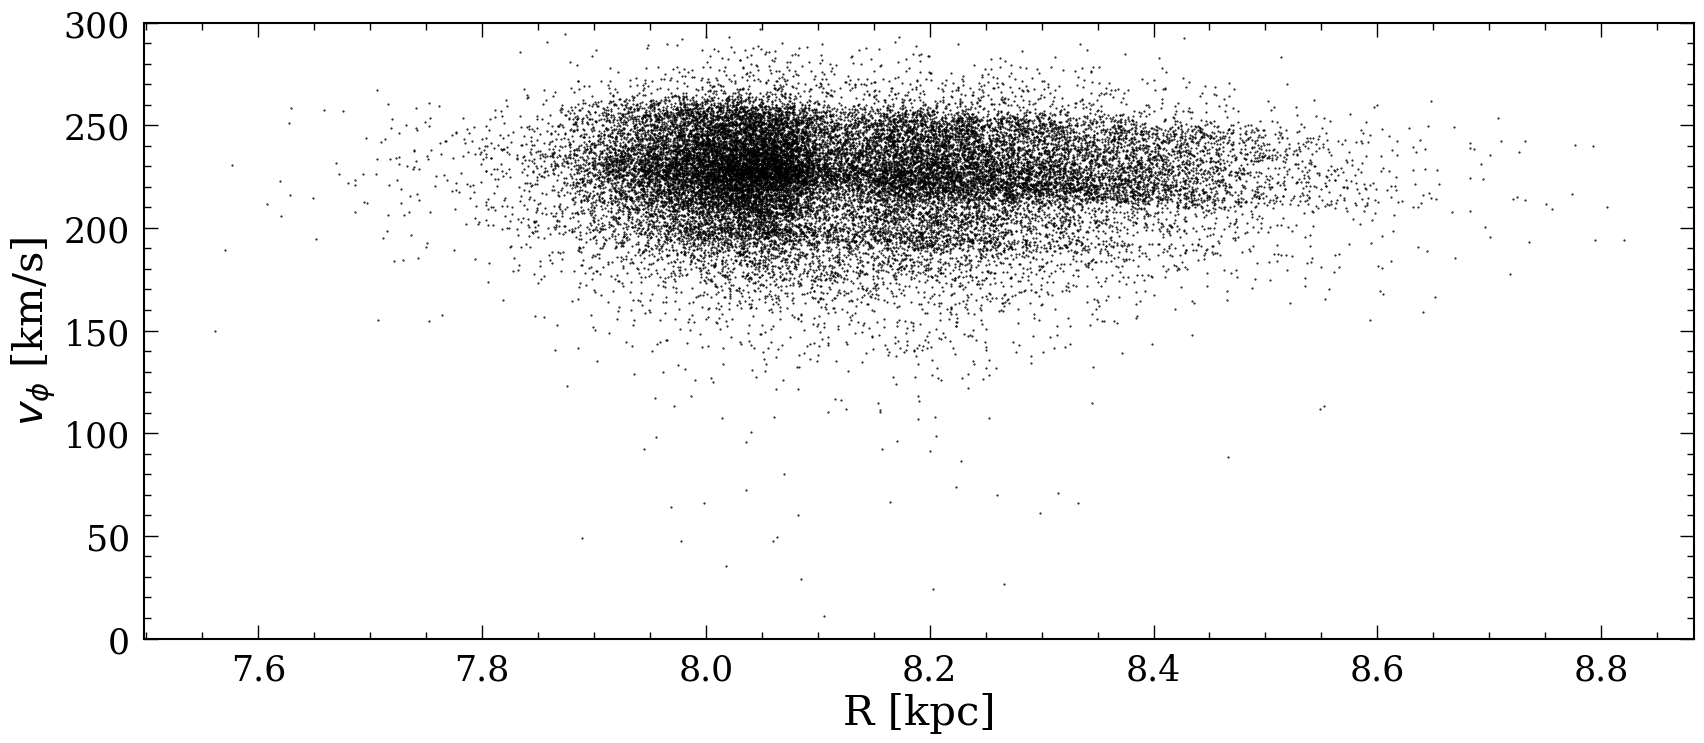

In [25]:
msel = (abs(ztfstars['R']-8.2)<0.2)
print(sum(msel))

plt.figure()
plt.scatter(ztfstars[msel]['R'], ztfstars[msel]['z'], 
            c='k', s=1)

plt.figure(figsize=(10,8))
plt.hexbin((ztfstars[msel]['vz'])/np.std(ztfstars[msel]['vz']), 
           ztfstars[msel]['z']/np.std(ztfstars[msel]['z']), 
           C=ztfstars[msel]['vphi']/np.median(ztfstars[msel]['vphi'])-1,vmin=-0.05,vmax=0.05,
           extent=(-4,4,-4,4), cmap=plt.get_cmap('jet',10),
          gridsize=50,reduce_C_function=np.median,mincnt=10)
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.colorbar(label='$v_ϕ$ [km/s]')
plt.xlabel('$v_z$/$σ_{vz}$')
plt.ylabel('$z$/$σ_{z}$')


plt.figure(figsize=(20,8))
plt.plot(ztfstars['R'], ztfstars['vphi'], 'k.',markersize=1)
plt.ylim([0,300])
plt.xlabel('R [kpc]')
plt.ylabel('$v_ϕ$ [km/s]')


  0%|                                                                                                              | 0/49 [00:00<?, ?it/s]/var/folders/w0/h14c78gj4rs91wsbcjh87y2m0000gn/T/ipykernel_9700/4005734797.py:9: RuntimeWarning: invalid value encountered in true_divide
  H[i,:] = H[i,:]/sum(m)
100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 49/49 [00:00<00:00, 683.32it/s]


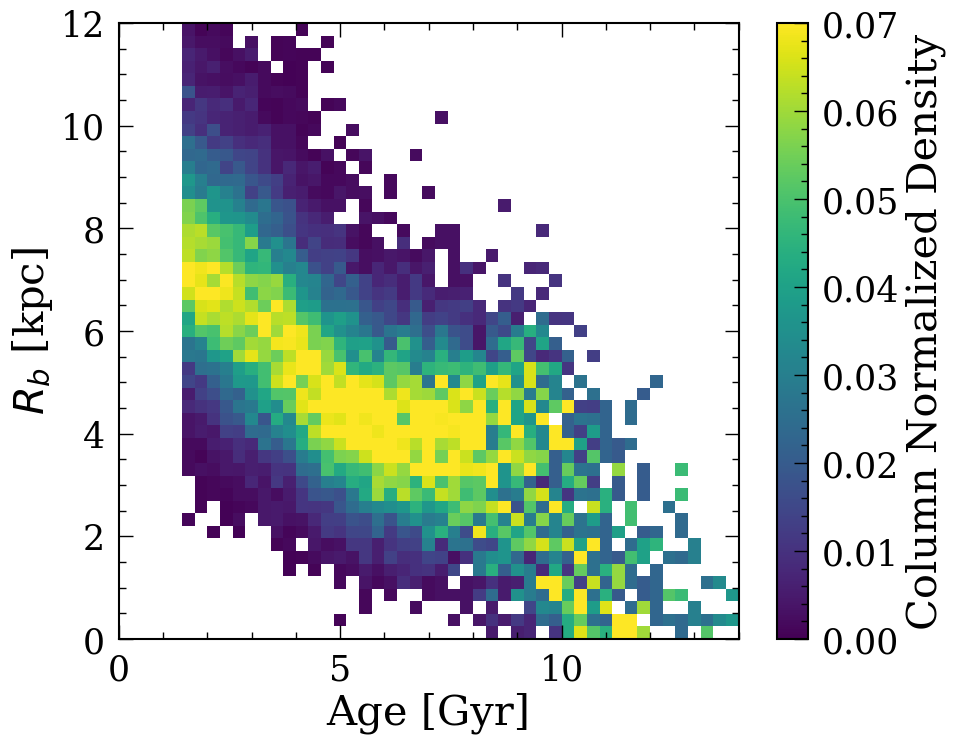

In [26]:
def coldensity(x,y,binsize=50,extend=[]):
    if len(extend)==0:
        extend=(min(x),max(x),min(y),max(y))
    H, yedges, xedges = np.histogram2d(x, y, 
                                bins=(np.linspace(extend[0],extend[1],binsize),
                                        np.linspace(extend[2],extend[3],binsize)))
    for i in trange(len(yedges)-1):
        m = (x>yedges[i])&(x<yedges[i+1])
        H[i,:] = H[i,:]/sum(m)

    for i in range(len(H[0,:])):
        for j in range(len(H[:,0])):
            if H[j,i] == 0:
                H[j,i] = np.nan

    return yedges, xedges, H.T



plt.figure(figsize=(10,8))
"""plt.hexbin(ztfstars['gyroAge'], ztfstars['Rb'], cmap='binary',
          extent=(0,14,0,12), mincnt=2, gridsize=50, bins='log')"""

yedges, xedges, H = coldensity(ztfstars['gyroAge'], ztfstars['Rb'],binsize=50,
          extend=(0,14,0,12))

plt.pcolormesh(yedges, xedges, H, vmin=0, vmax=0.07)


plt.colorbar(label='Column Normalized Density')
plt.xlabel('Age [Gyr]')
plt.ylabel('$R_b$ [kpc]')
plt.savefig('Rb_hist.png')

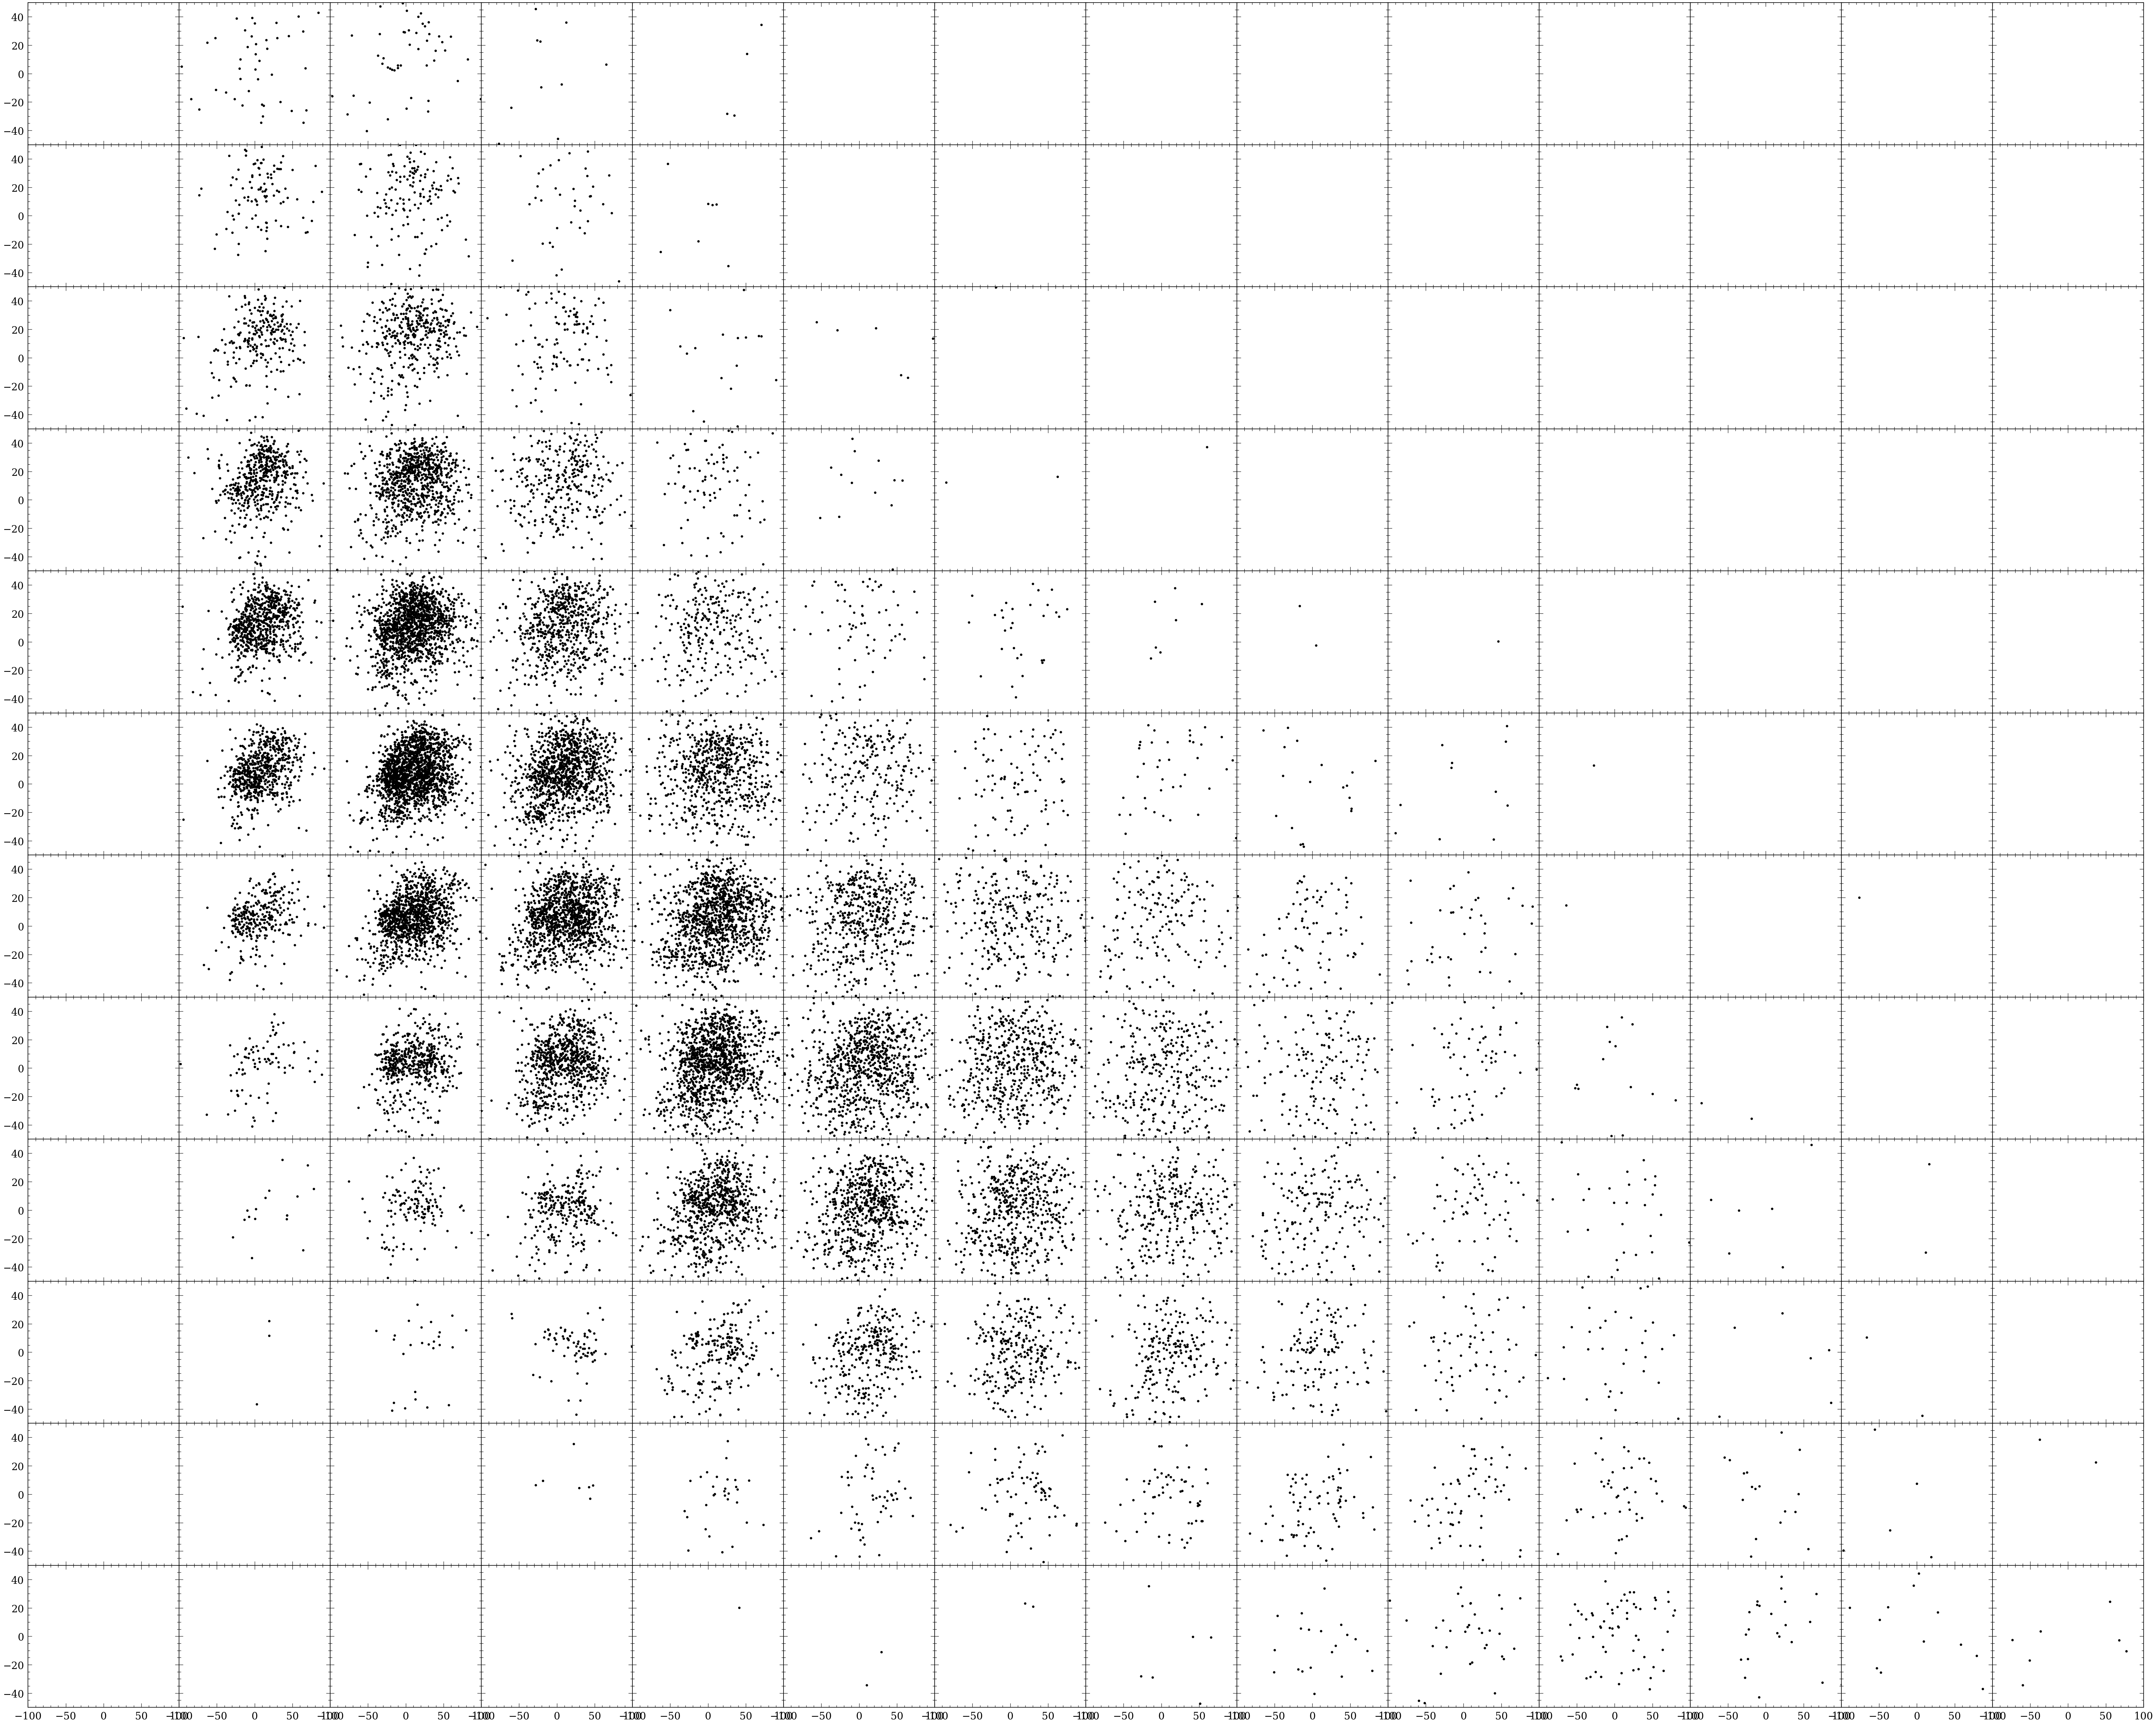

In [27]:
AgeRange = np.linspace(0,14,15)
RbRagne = np.linspace(0,12,13)

fig, plots = plt.subplots(len(RbRagne)-1, len(AgeRange)-1, 
                          figsize=(5*len(AgeRange), 5*(len(RbRagne)-1)),
                         sharex=True, sharey=True,
                          gridspec_kw = {'wspace':0, 'hspace':0})
for i in range(len(AgeRange)-1):
    m = (ztfstars['gyroAge']>AgeRange[i])&(ztfstars['gyroAge']<AgeRange[i+1])
    for j in range(len(RbRagne)-1):
        m2 = m&(ztfstars['Rb']>RbRagne[j])&(ztfstars['Rb']<RbRagne[j+1])
        if sum(m2)==0:
            continue
        plots[len(RbRagne)-j-2, i].plot(ztfstars[m2]['vx'], ztfstars[m2]['vy']-220, 'k.',
                            markersize=10)
        plots[len(RbRagne)-j-2, i].set_xlim([-100,100])
        plots[len(RbRagne)-j-2, i].set_ylim([-50,50])
        #plots[len(RbRagne)-j-2, i].set_title('%.1f < $R_b$ < %.1f; %.1f < Age < %.1f'%(RbRagne[j],RbRagne[j+1],AgeRange[i],AgeRange[i+1]), fontsize=25)

fig.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.savefig('kinematic.png')


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:00<00:00, 1349.83it/s]


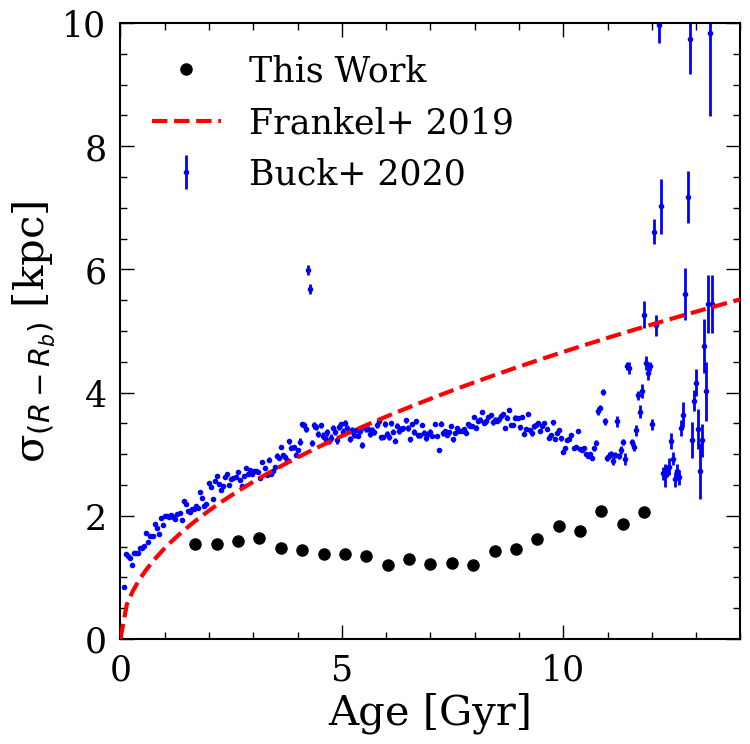

In [28]:
import astropy.uncertainty as unc


agebincalc_rm = np.linspace(0,14,30)
mean_dr = np.zeros(len(agebincalc_rm)-1)

ztfstars['AGE_sca'] = ztfstars['gyroAge']
ztfstars = ztfstars.loc[ztfstars['Rb']<20]
ztfstars = ztfstars.loc[ztfstars['mh_xgboost']>-1]
ztfstars = ztfstars.loc[abs(ztfstars['R']-8.2)<0.2]

for i in trange(len(agebincalc_rm)-1):
    sub_tryRb_sing = ztfstars.loc[(ztfstars['AGE_sca']>agebincalc_rm[i])&(ztfstars['AGE_sca']<agebincalc_rm[i+1])]
    
    if len(sub_tryRb_sing)<50:
        mean_dr[i] = np.nan
        continue
        
    
    #drdist = 1.5*(np.median(abs(sub_tryRb_sing['Rb']-sub_tryRb_sing['R'])))
    drdist = (np.std((sub_tryRb_sing['Rb']-sub_tryRb_sing['R'])))
    
    mean_dr[i] = np.mean(drdist)
    
    
plt.figure(figsize=(8,8))
dR_sim = pd.read_pickle('../FeHGrad/BuckMigration.pkl')

plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,
             'ko', label='This Work', 
            markersize=8)
plt.plot(np.linspace(0,14,100), 
         3.9*np.sqrt(np.linspace(0,14,100)/7), 
         'r--', label='Frankel+ 2019', zorder=10,
        linewidth=3)

m = (dR_sim['NoS']>30)
plt.errorbar(dR_sim['meanage'][m], dR_sim['meandR'][m],
             yerr=dR_sim['meadR_err'][m], fmt='bo', 
             label='Buck+ 2020', markersize=3)

plt.xlim([0,14])
plt.ylim([0,10])
plt.xlabel('Age [Gyr]')
plt.ylabel('σ$_{(R-R_b)}$ [kpc]')
plt.legend()

plt.savefig('migrationStr.png',bbox_inches='tight')

In [145]:
legacy = pd.read_csv('../NewGyroKineage/GP_pred_LEGACY.csv')

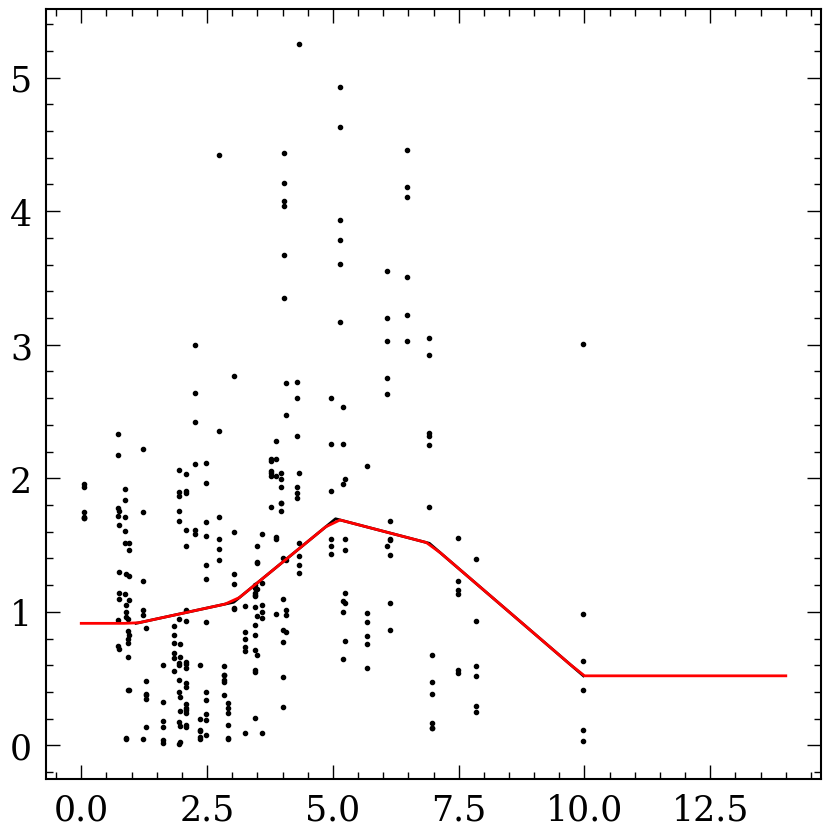

In [162]:
legacy = legacy.sort_values('gyroage')
plt.plot(legacy['gyroage'], abs(legacy['Age']-legacy['gyroage']), 'k.')
x, y = legacy['gyroage'], abs(legacy['Age']-legacy['gyroage'])
x_m, y_m = movingMed_time(x,y,0.2,2)
plt.plot(x_m, y_m, 'k-')

errfit = interp1d(x_m, y_m, bounds_error=False,
                  fill_value=(y_m[0], y_m[-1]))
plt.plot(np.linspace(0,14,50), errfit(np.linspace(0,14,50)), 'r-')

ztfstars['gyroAge_err'] = errfit(ztfstars['gyroAge'])

In [53]:
def avr(age, r, vz, rbin=np.linspace(6,12,4), agebin=np.linspace(0,14,10),Nostar=100):
    colors = getcolor(range(len(rbin)+1))
    avrs = np.zeros((len(rbin)-1, len(agebin)-1))
    overallvz = np.zeros(len(agebin)-1)
    
    for i in range(len(rbin)-1):
        m = (r>rbin[i])&(r<rbin[i+1])
        age_r, r_r, vz_r = age[m], r[m], vz[m]
        for j in range(len(agebin)-1):
            m2 = (age_r>agebin[j])&(age_r<agebin[j+1])
            if sum(m2)<Nostar:
                avrs[i,j]=np.nan
            else:
                vz_r_age = vz_r[m2]
                #avrs[i,j] = 1.5*sum(abs(vz_r_age-np.median(vz_r_age)))/sum(m2)
                avrs[i,j] = np.std(vz_r_age)
                
    for i in range(len(agebin)-1):
        m = (age>agebin[i])&(age<agebin[i+1])
        if sum(m)<Nostar:
            overallvz[i] = np.nan
        else:
            overallvz[i] = np.std(vz[m])
        
                
    
    return (agebin[:-1]+agebin[1:])/2, (rbin[:-1]+rbin[1:])/2, avrs, overallvz



In [179]:
np.shape(avrs_z_s[i,:,:])

(4, 29)

In [199]:
avrs_z_s = np.zeros((50,4,29))
overall_z_s = np.zeros((50,29))

avrs_phi_s = np.zeros((50,4,29))
overall_phi_s = np.zeros((50,29))

avrs_r_s = np.zeros((50,4,29))
overall_r_s = np.zeros((50,29))

trueage = ztfstars['gyroAge'].values
trueage_err = ztfstars['gyroAge_err'].values
for i in trange(50):
    newage = np.array([np.random.normal(trueage[i], trueage_err[i]) for i in range(len(trueage))])
    ages, rs, avrs_z_s[i,:,:], overall_z_s[i,:] = avr(ztfstars['Rb'].values, newage,
                           ztfstars['vz'].values, 
                         rbin=np.linspace(0,10,5), agebin=np.linspace(2,20,30))
    
    ages, rs, avrs_phi_s[i,:,:], overall_phi_s[i,:] = avr(ztfstars['Rb'].values, newage,
                         ztfstars['vphi'].values, 
                     rbin=np.linspace(0,10,5), agebin=np.linspace(2,20,30))
    
    ages, rs, avrs_r_s[i,:,:], overall_r_s[i,:] = avr(ztfstars['Rb'].values, newage,
                       ztfstars['vr'].values, 
                     rbin=np.linspace(0,10,5), agebin=np.linspace(2,20,30))

avrs_z_err = np.zeros((4,29))
avrs_z = np.zeros((4,29))
overall_z_err = np.zeros(29)
overall_z = np.zeros(29)

avrs_phi_err = np.zeros((4,29))
avrs_phi = np.zeros((4,29))
overall_phi_err = np.zeros(29)
overall_phi = np.zeros(29)

avrs_r_err = np.zeros((4,29))
avrs_r = np.zeros((4,29))
overall_r_err = np.zeros(29)
overall_r = np.zeros(29)

for i in range(4):
    for j in range(29):
        avrs_z_err[i,j] = np.std(avrs_z_s[:,i,j])    
        avrs_z[i,j] = np.median(avrs_z_s[:,i,j])
        
        avrs_phi_err[i,j] = np.std(avrs_phi_s[:,i,j])    
        avrs_phi[i,j] = np.median(avrs_phi_s[:,i,j])
        
        avrs_r_err[i,j] = np.std(avrs_r_s[:,i,j])    
        avrs_r[i,j] = np.median(avrs_r_s[:,i,j])
        
for i in range(29):
    overall_z_err[i] = np.std(overall_z_s[:,i])    
    overall_z[i] = np.median(overall_z_s[:,i])
    
    overall_phi_err[i] = np.std(overall_phi_s[:,i])    
    overall_phi[i] = np.median(overall_phi_s[:,i])
    
    overall_r_err[i] = np.std(overall_r_s[:,i])    
    overall_r[i] = np.median(overall_r_s[:,i])

100%|█████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [02:46<00:00,  3.34s/it]


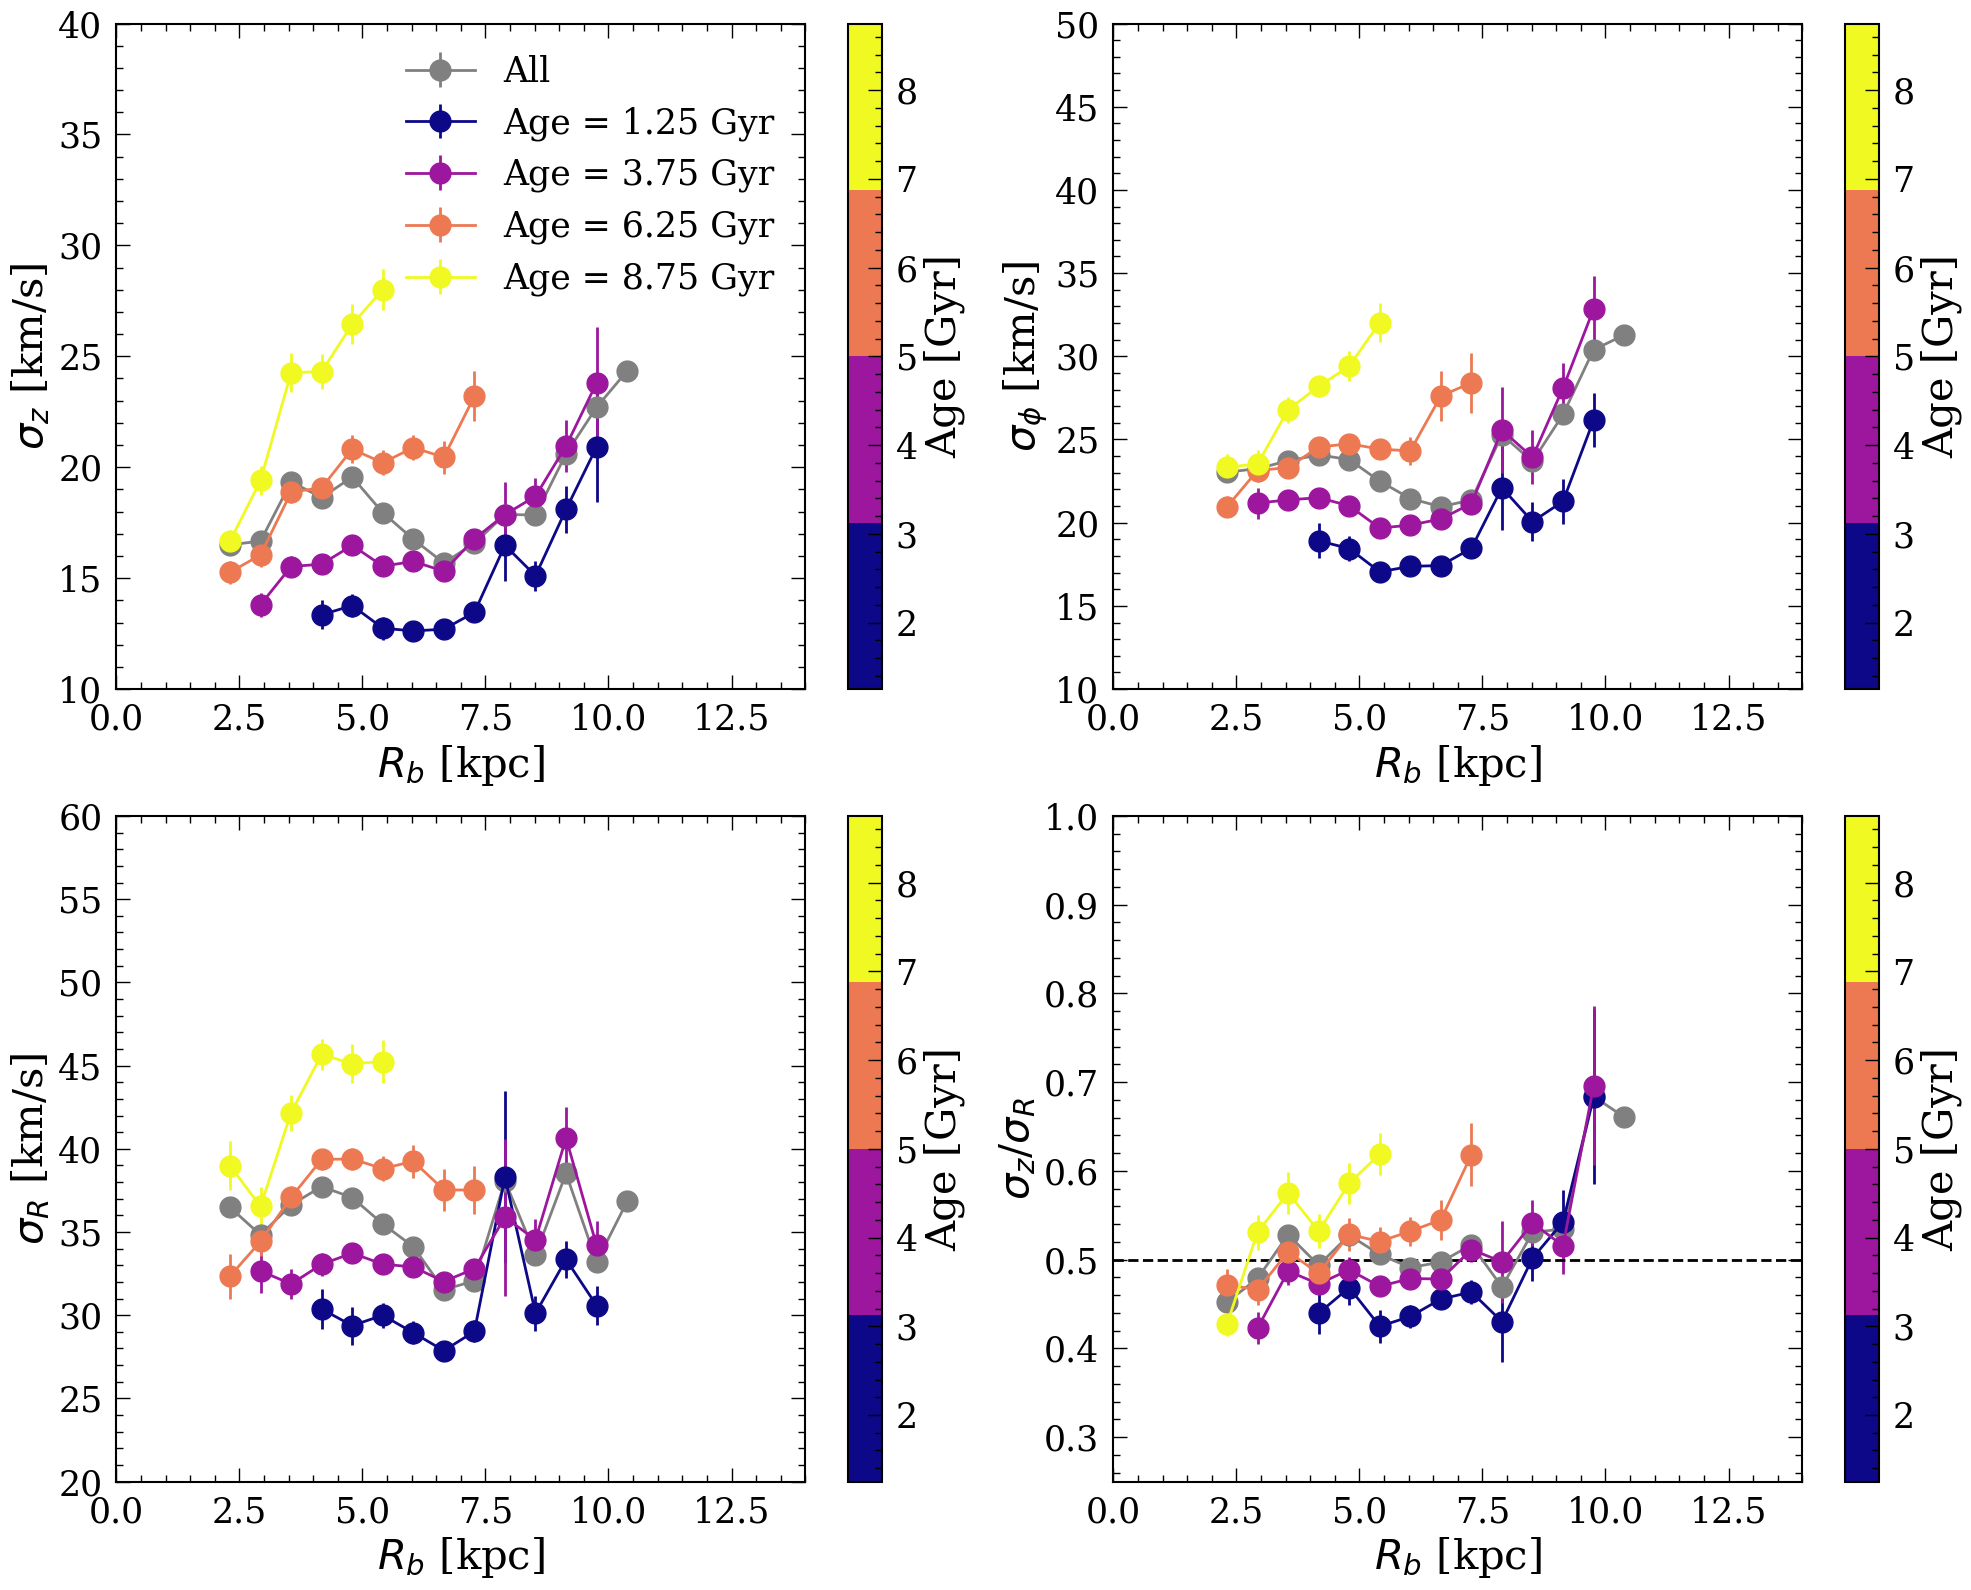

In [200]:

colors = getcolor(np.linspace(2,12,4))

plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
plt.errorbar(ages, overall_z, yerr=overall_z_err, fmt='o-', 
              color='grey', label='All',
            markersize=15)

for i in range(len(rs)):
    plt.errorbar(ages, avrs_z[i,:], yerr=avrs_z_err[i,:], fmt='o-', 
                  color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_z$ [km/s]')
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',4))
plt.ylim([10, 40])
plt.xlim([0,14])
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
plt.legend()


plt.subplot(2,2,2)
plt.errorbar(ages, overall_phi, yerr=overall_phi_err, fmt='o-', 
             color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.errorbar(ages, avrs_phi[i,:], yerr=avrs_phi_err[i,:], fmt='o-', 
                 color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_ϕ$ [km/s]')
plt.ylim([10, 50])
plt.xlim([0,14])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',4))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()



plt.subplot(2,2,3)
plt.errorbar(ages, overall_r, yerr=overall_r_err, fmt='o-', 
             color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.errorbar(ages, avrs_r[i,:], yerr=avrs_r_err[i,:], fmt='o-', 
                 color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_R$ [km/s]')
plt.ylim([20, 60])
plt.xlim([0,14])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',4))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()



plt.subplot(2,2,4)
plt.errorbar(ages, overall_z/overall_r, 
             yerr=np.sqrt((overall_z_err/overall_r)**2+(overall_z/(overall_r**2)*overall_z_err)**2),
             fmt='o-', color='grey', label='All',
            markersize=15)

for i in range(len(rs)):
    plt.errorbar(ages, avrs_z[i,:]/avrs_r[i,:], 
                 yerr=np.sqrt((avrs_z_err[i,:]/avrs_r[i,:])**2+(avrs_z[i,:]/(avrs_r[i,:]**2)*avrs_z_err[i,:])**2),
                 fmt='o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_z$/$σ_R$')
plt.ylim([0.25, 1])
plt.xlim([0,14])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',4))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()

plt.plot([0,16], [0.5,0.5], 'k--')



plt.tight_layout()

In [211]:
rbins = np.linspace(2,10,4)
agebins = np.linspace(0,12,13)

avrs_z_s = np.zeros((50,len(rbins)-1,len(agebins)-1))
overall_z_s = np.zeros((50,len(agebins)-1))

avrs_phi_s = np.zeros((50,len(rbins)-1,len(agebins)-1))
overall_phi_s = np.zeros((50,len(agebins)-1))

avrs_r_s = np.zeros((50,len(rbins)-1,len(agebins)-1))
overall_r_s = np.zeros((50,len(agebins)-1))

trueage = ztfstars['gyroAge'].values
trueage_err = ztfstars['gyroAge_err'].values
for i in trange(50):
    newage = np.array([np.random.normal(trueage[i], trueage_err[i]) for i in range(len(trueage))])
    ages, rs, avrs_z_s[i,:,:], overall_z_s[i,:] = avr(newage, ztfstars['Rb'].values,
                           ztfstars['vz'].values, 
                         rbin=rbins, agebin=agebins)
    
    ages, rs, avrs_phi_s[i,:,:], overall_phi_s[i,:] = avr(newage, ztfstars['Rb'].values, 
                         ztfstars['vphi'].values, 
                     rbin=rbins, agebin=agebins)
    
    ages, rs, avrs_r_s[i,:,:], overall_r_s[i,:] = avr(newage, ztfstars['Rb'].values, 
                       ztfstars['vr'].values, 
                     rbin=rbins, agebin=agebins)

avrs_z_err = np.zeros((len(rbins)-1,len(agebins)-1))
avrs_z = np.zeros((len(rbins)-1,len(agebins)-1))
overall_z_err = np.zeros(len(agebins)-1)
overall_z = np.zeros(len(agebins)-1)

avrs_phi_err = np.zeros((len(rbins)-1,len(agebins)-1))
avrs_phi = np.zeros((len(rbins)-1,len(agebins)-1))
overall_phi_err = np.zeros(len(agebins)-1)
overall_phi = np.zeros(len(agebins)-1)

avrs_r_err = np.zeros((len(rbins)-1,len(agebins)-1))
avrs_r = np.zeros((len(rbins)-1,len(agebins)-1))
overall_r_err = np.zeros(len(agebins)-1)
overall_r = np.zeros(len(agebins)-1)

for i in range(len(rbins)-1):
    for j in range(len(agebins)-1):
        avrs_z_err[i,j] = np.std(avrs_z_s[:,i,j])    
        avrs_z[i,j] = np.median(avrs_z_s[:,i,j])
        
        avrs_phi_err[i,j] = np.std(avrs_phi_s[:,i,j])    
        avrs_phi[i,j] = np.median(avrs_phi_s[:,i,j])
        
        avrs_r_err[i,j] = np.std(avrs_r_s[:,i,j])    
        avrs_r[i,j] = np.median(avrs_r_s[:,i,j])
        
for i in range(len(agebins)-1):
    overall_z_err[i] = np.std(overall_z_s[:,i])    
    overall_z[i] = np.median(overall_z_s[:,i])
    
    overall_phi_err[i] = np.std(overall_phi_s[:,i])    
    overall_phi[i] = np.median(overall_phi_s[:,i])
    
    overall_r_err[i] = np.std(overall_r_s[:,i])    
    overall_r[i] = np.median(overall_r_s[:,i])
    



100%|█████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:07<00:00,  1.34s/it]


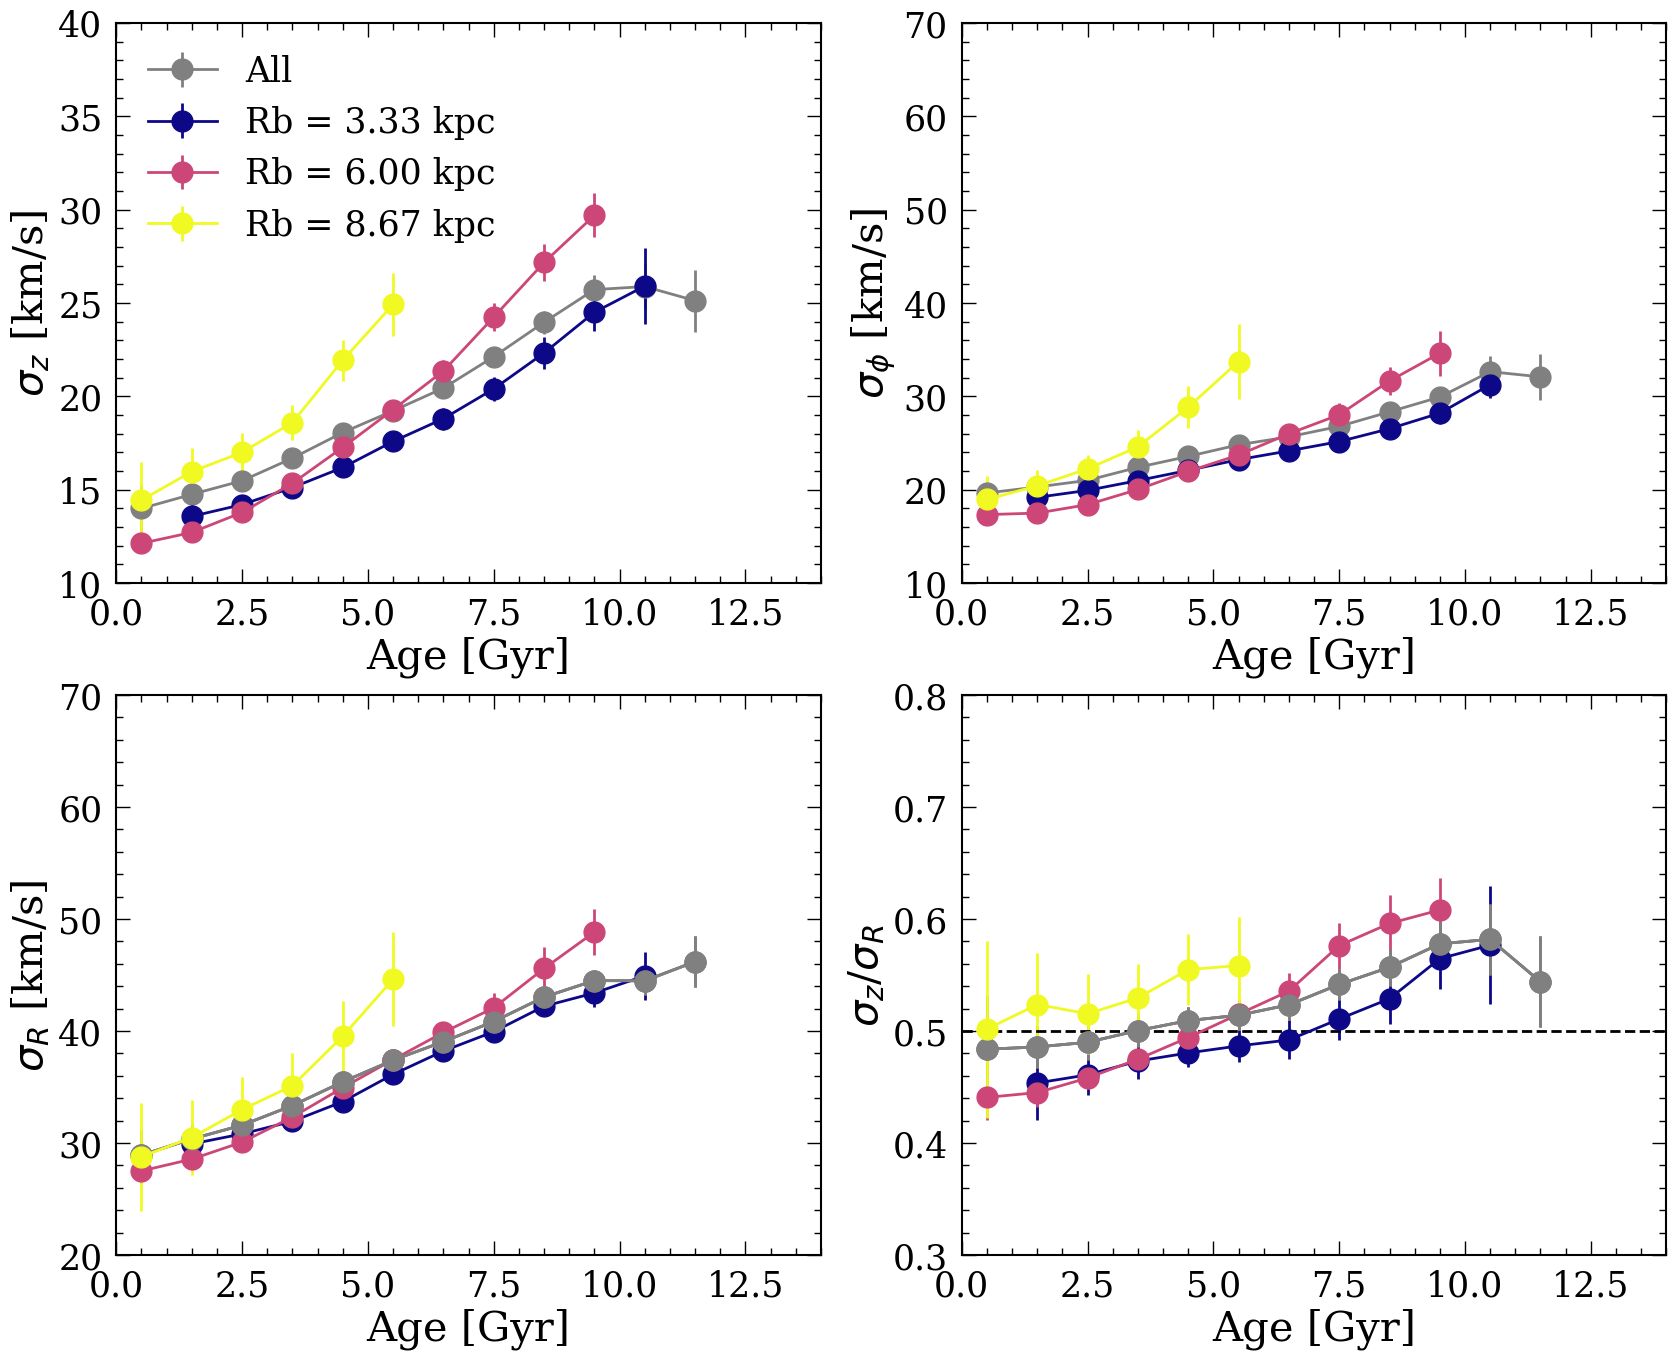

In [212]:


plt.figure(figsize=(20,16))
colors = getcolor(rs)
plt.subplot(2,2,1)
plt.errorbar(ages, overall_z, yerr=overall_z_err,
             fmt='o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.errorbar(ages, avrs_z[i,:], yerr=avrs_z_err[i,:],
                 fmt='o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=15)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_z$ [km/s]')
plt.ylim([10, 40])
plt.xlim([0,14])
plt.legend()



plt.subplot(2,2,2)
plt.errorbar(ages, overall_phi, yerr=overall_phi_err,
         fmt='o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.errorbar(ages, avrs_phi[i,:], yerr=avrs_phi_err[i,:],
             fmt='o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=15)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_ϕ$ [km/s]')
plt.ylim([10, 70])
plt.xlim([0,14])



plt.subplot(2,2,3)
for i in range(len(rs)):
    plt.errorbar(ages, overall_r, yerr=overall_r_err,
             fmt='o-', color='grey', label='All',
            markersize=15)
    plt.errorbar(ages, avrs_r[i,:], yerr=avrs_r_err[i,:],
             fmt='o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=15)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_R$ [km/s]')
plt.ylim([20, 70])
plt.xlim([0,14])



plt.subplot(2,2,4)
for i in range(len(rs)):
    plt.errorbar(ages, overall_z/overall_r, 
                 yerr=np.sqrt((overall_z_err/overall_r)**2+(overall_z/(overall_r**2)*overall_z_err)**2),
                 fmt='o-', color='grey', label='All',
            markersize=15)
    plt.errorbar(ages, avrs_z[i,:]/avrs_r[i,:], 
                 yerr=np.sqrt((avrs_z_err[i,:]/avrs_r[i,:])**2+(avrs_z[i,:]/(avrs_r[i,:]**2)*avrs_z_err[i,:])**2),
                 fmt='o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=15)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_z$/$σ_R$')
plt.ylim([0.3, 0.8])
plt.xlim([0,14])

plt.plot([0,16], [0.5,0.5], 'k--')







20443


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 1090.30it/s]


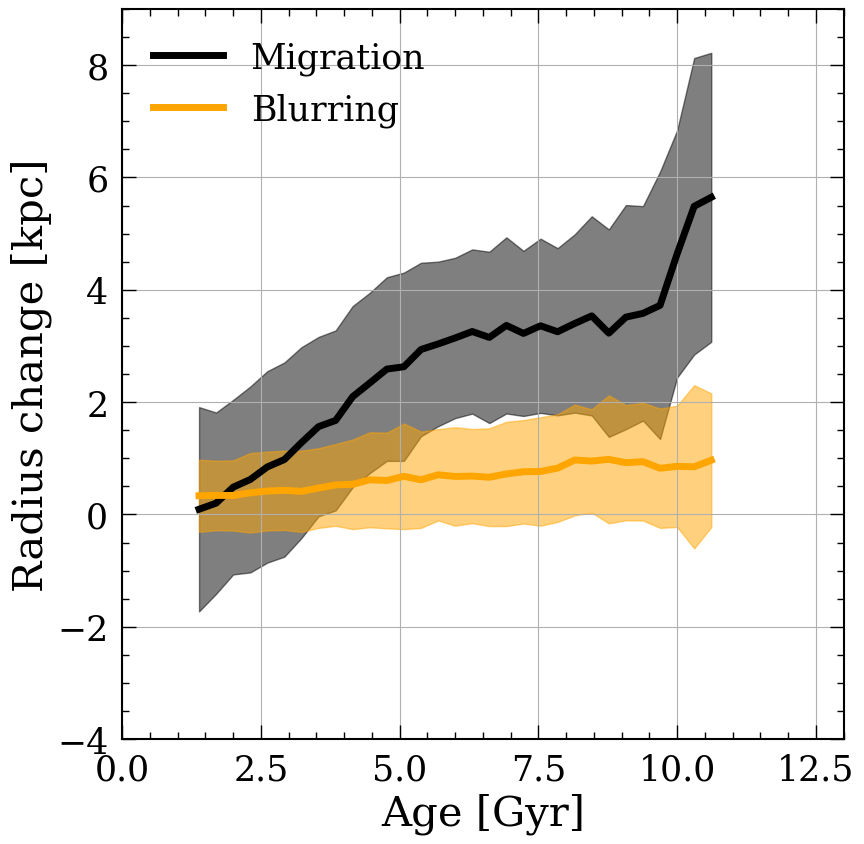

In [468]:
import astropy.uncertainty as unc

agebincalc_rm = np.linspace(0,12,40)
sub_tryRb_sub_all = ztfstars.loc[abs(ztfstars['Rg'])<20]
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[abs(sub_tryRb_sub_all['R']-8.2)<0.2]
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['Rb']<20]
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['mh_xgboost']>-1]

plt.figure(figsize=(16,16))
count = 1

sub_tryRb_sub = sub_tryRb_sub_all
print(len(sub_tryRb_sub))

mean_dr = np.zeros(len(agebincalc_rm)-1)
std_dr = np.zeros(len(agebincalc_rm)-1)

mean_blr = np.zeros(len(agebincalc_rm)-1)
std_blr = np.zeros(len(agebincalc_rm)-1)

for i in trange(len(agebincalc_rm)-1):
    sub_tryRb_sing = sub_tryRb_sub.loc[(sub_tryRb_sub['gyroAge']>agebincalc_rm[i])&(sub_tryRb_sub['gyroAge']<agebincalc_rm[i+1])]

    sub_tryRb_sing = sub_tryRb_sing.dropna(subset=['Rb','Rg'])

    if len(sub_tryRb_sing)<50:
        mean_dr[i] = np.nan
        std_dr[i] = np.nan

        mean_blr[i] = np.nan
        std_blr[i] = np.nan
        continue

    mean_dr[i] = np.mean(sub_tryRb_sing['Rg']-sub_tryRb_sing['Rb'])
    std_dr[i] = np.std(sub_tryRb_sing['Rg']-sub_tryRb_sing['Rb'])
    mean_blr[i] = np.mean(sub_tryRb_sing['R']-sub_tryRb_sing['Rg'])
    std_blr[i] = np.std(sub_tryRb_sing['R']-sub_tryRb_sing['Rg'])


plt.subplot(2,2,count)
"""plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,
             yerr=std_dr, fmt='.',  color='k', alpha=0.5,
            linewidth=10)"""
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,'-',
         color='k', linewidth=5, label='Migration')
plt.fill_between((agebincalc_rm[1:]+agebincalc_rm[:-1])/2,
                mean_dr-std_dr, mean_dr+std_dr,color='k',
                alpha=0.5)

"""plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,
             yerr=std_blr, fmt='.',  color='orange', alpha=0.5,
            linewidth=10)"""
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,'-',
         color='orange', linewidth=5, label='Blurring')
plt.fill_between((agebincalc_rm[1:]+agebincalc_rm[:-1])/2,
                mean_blr-std_blr, mean_blr+std_blr,color='orange',
                alpha=0.5)
plt.grid()

plt.xlim([0,13])
plt.ylim([-4,9])
plt.xlabel('Age [Gyr]')
plt.ylabel('Radius change [kpc]')
plt.legend(loc=2)
plt.tight_layout()

plt.savefig('migrationStr.png',bbox_inches='tight')

# Simulation

In [47]:
df_sim = pd.read_pickle('../NIHAORbirth/g2.79e12_z_0_decomp.pkl')
vscale = 240/340
rscale = 3.5/5.6
df_sim['vx'] = df_sim['vx']*vscale
df_sim['vy'] = df_sim['vy']*vscale
df_sim['vz'] = df_sim['vz']*vscale

df_sim['R'] = df_sim['R']*rscale
df_sim['Rg'] = df_sim['Rg']*rscale
df_sim['Rb'] = df_sim['Rbir']*rscale
df_sim['x'] = df_sim['x']*rscale
df_sim['y'] = df_sim['y']*rscale
df_sim['z'] = df_sim['z']*rscale

df_sim['vr'] = -(df_sim['x'] * df_sim['vx'] + df_sim['y'] * df_sim['vy'])/df_sim['R']
df_sim['vphi'] = -(df_sim['x'] * df_sim['vy'] - df_sim['y'] * df_sim['vx'])/df_sim['R']



print(len(df_sim)), df_sim.columns

6672510


(None,
 Index(['z', 'metals', 'rxy', 'y', 'mass', 'eps', 'x', 'phi', 'j_circ', 'ke',
        'te', 'decomp', 'j_x', 'j_y', 'tform', 'iord', 'j_z', 'vy', 'vz',
        'vcxy', 'jz_by_jzcirc', 'vx', 'ofe', 'feh', 'age', 'Rbir', 'zbir', 'R',
        'dR', 'dz', 'vc', 'Rg', 'Rb', 'vr', 'vphi'],
       dtype='object'))

In [78]:
merger = pd.read_pickle('../FeHGrad/g2.79e12_merger_Lucy.dat')
merger = pd.DataFrame(np.array((merger['time'], merger['vir_ratio'])).T,
                      columns=['time','ratio'])
merger['time'] = 13.8-merger['time']

83531
83161


100%|████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:00<00:00, 947.38it/s]


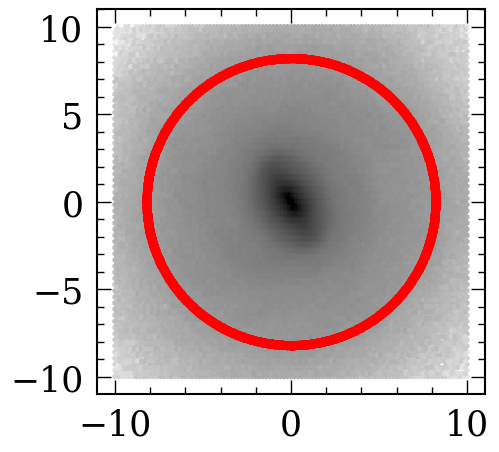

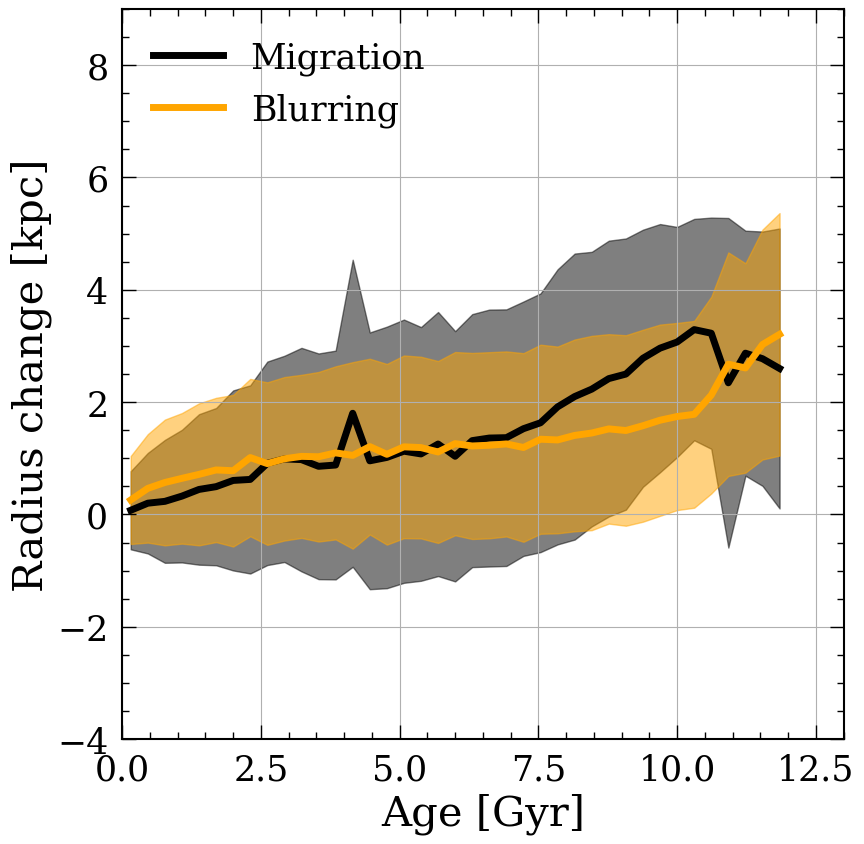

In [134]:
import astropy.uncertainty as unc
import math

agebincalc_rm = np.linspace(0,12,40)
sub_tryRb_sub_all = df_sim.loc[abs(df_sim['Rg'])<20]

selR = 8.2
selang = -50

selx = selR*np.cos(selang/180*np.pi)
sely = selR*np.sin(selang/180*np.pi)

#sub_tryRb_sub_all = sub_tryRb_sub_all.loc[np.sqrt((sub_tryRb_sub_all['x']-8.2)**2+(sub_tryRb_sub_all['y'])**2)<1]
#sub_tryRb_sub_all = sub_tryRb_sub_all.loc[np.sqrt((sub_tryRb_sub_all['x']-selx)**2+(sub_tryRb_sub_all['y']-sely)**2)<1]
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[abs(sub_tryRb_sub_all['R']-8.2)<0.2]

print(len(sub_tryRb_sub_all))
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['Rb']<20]
sub_tryRb_sub_all = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['feh']>-1]


plt.figure(figsize=(5,5))
plt.hexbin(df_sim['x'],df_sim['y'], extent=(-10,10,-10,10),
          cmap='binary',bins='log')
plt.plot(sub_tryRb_sub_all['x'], sub_tryRb_sub_all['y'],' r.', markersize=1)



plt.figure(figsize=(16,16))
count = 1

sub_tryRb_sub = sub_tryRb_sub_all
print(len(sub_tryRb_sub))

mean_dr = np.zeros(len(agebincalc_rm)-1)
std_dr = np.zeros(len(agebincalc_rm)-1)

mean_blr = np.zeros(len(agebincalc_rm)-1)
std_blr = np.zeros(len(agebincalc_rm)-1)


for i in trange(len(agebincalc_rm)-1):
    sub_tryRb_sing = sub_tryRb_sub.loc[(sub_tryRb_sub['age']>agebincalc_rm[i])&(sub_tryRb_sub['age']<agebincalc_rm[i+1])]

    sub_tryRb_sing = sub_tryRb_sing.dropna(subset=['Rb','Rg'])

    if len(sub_tryRb_sing)<50:
        mean_dr[i] = np.nan
        std_dr[i] = np.nan

        mean_blr[i] = np.nan
        std_blr[i] = np.nan
        continue

    mean_dr[i] = np.mean(sub_tryRb_sing['Rg']-sub_tryRb_sing['Rb'])
    std_dr[i] = np.std(sub_tryRb_sing['Rg']-sub_tryRb_sing['Rb'])
    mean_blr[i] = np.mean(sub_tryRb_sing['R']-sub_tryRb_sing['Rg'])
    std_blr[i] = np.std(sub_tryRb_sing['R']-sub_tryRb_sing['Rg'])


plt.subplot(2,2,count)
"""plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,
             yerr=std_dr, fmt='.',  color='k', alpha=0.5,
            linewidth=10)"""
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_dr,'-',
         color='k', linewidth=5, label='Migration')
plt.fill_between((agebincalc_rm[1:]+agebincalc_rm[:-1])/2,
                mean_dr-std_dr, mean_dr+std_dr,color='k',
                alpha=0.5)

"""plt.errorbar((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,
             yerr=std_blr, fmt='.',  color='orange', alpha=0.5,
            linewidth=10)"""
plt.plot((agebincalc_rm[1:]+agebincalc_rm[:-1])/2, mean_blr,'-',
         color='orange', linewidth=5, label='Blurring')
plt.fill_between((agebincalc_rm[1:]+agebincalc_rm[:-1])/2,
                mean_blr-std_blr, mean_blr+std_blr,color='orange',
                alpha=0.5)
plt.grid()

plt.xlim([0,13])
plt.ylim([-4,9])
plt.xlabel('Age [Gyr]')
plt.ylabel('Radius change [kpc]')
plt.legend(loc=2)
plt.tight_layout()

plt.savefig('migrationStr_sim.png',bbox_inches='tight')

In [135]:
"""plt.hexbin(sub_tryRb_sub_all['age'],sub_tryRb_sub_all['Rb'], mincnt=1,
          gridsize=40)"""
#sub_tryRb_sub_all['age'].hist()

"plt.hexbin(sub_tryRb_sub_all['age'],sub_tryRb_sub_all['Rb'], mincnt=1,\n          gridsize=40)"

In [136]:
"""plt.figure(figsize=(10,8))
sub_tryRb_plt = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['age']<5]
plt.hexbin(sub_tryRb_plt['Rg'], sub_tryRb_plt['Rg']-sub_tryRb_plt['Rb'], 
           cmap=plt.get_cmap('binary', 10),
          extent=(5,10,-5,5),reduce_C_function=np.mean,
          mincnt=1)
sub_tryRb_plt = sub_tryRb_plt.sort_values('Rg').reset_index(drop=True)
sub_tryRb_plt = sub_tryRb_plt.loc[(sub_tryRb_plt['Rg']>5)&(sub_tryRb_plt['Rg']<10)]
rg_m, dr_m = movingMed_time(sub_tryRb_plt['Rg'], 
                            sub_tryRb_plt['Rg']-sub_tryRb_plt['Rb'],
              0.1,0.3)
rg_m, dr_m = rg_m[~(dr_m==0)], dr_m[~(dr_m==0)]
plt.plot(rg_m, dr_m, 'r-')
plt.plot([0,15],[0,0],'r-')
plt.xlim([5, 10])
plt.ylim([-5,5])
plt.xlabel('$R_g$ [kpc]')
plt.ylabel('$R_g-R_b$ [kpc]')
#plt.colorbar(label='Age [Gyr]')
"""

"plt.figure(figsize=(10,8))\nsub_tryRb_plt = sub_tryRb_sub_all.loc[sub_tryRb_sub_all['age']<5]\nplt.hexbin(sub_tryRb_plt['Rg'], sub_tryRb_plt['Rg']-sub_tryRb_plt['Rb'], \n           cmap=plt.get_cmap('binary', 10),\n          extent=(5,10,-5,5),reduce_C_function=np.mean,\n          mincnt=1)\nsub_tryRb_plt = sub_tryRb_plt.sort_values('Rg').reset_index(drop=True)\nsub_tryRb_plt = sub_tryRb_plt.loc[(sub_tryRb_plt['Rg']>5)&(sub_tryRb_plt['Rg']<10)]\nrg_m, dr_m = movingMed_time(sub_tryRb_plt['Rg'], \n                            sub_tryRb_plt['Rg']-sub_tryRb_plt['Rb'],\n              0.1,0.3)\nrg_m, dr_m = rg_m[~(dr_m==0)], dr_m[~(dr_m==0)]\nplt.plot(rg_m, dr_m, 'r-')\nplt.plot([0,15],[0,0],'r-')\nplt.xlim([5, 10])\nplt.ylim([-5,5])\nplt.xlabel('$R_g$ [kpc]')\nplt.ylabel('$R_g-R_b$ [kpc]')\n#plt.colorbar(label='Age [Gyr]')\n"

In [122]:
ages, rs, avrs_z, all_z = avr(sub_tryRb_sub_all['Rb'].values, sub_tryRb_sub_all['age'].values,
                       sub_tryRb_sub_all['vz'].values, 
                     rbin=np.linspace(0,12,5), agebin=np.linspace(2,20,40))

ages, rs, avrs_phi, all_phi = avr(sub_tryRb_sub_all['Rb'].values, sub_tryRb_sub_all['age'].values,
                         sub_tryRb_sub_all['vphi'].values, 
                     rbin=np.linspace(0,12,5), agebin=np.linspace(2,20,40))

ages, rs, avrs_r, all_r = avr(sub_tryRb_sub_all['Rb'].values, sub_tryRb_sub_all['age'].values,
                       sub_tryRb_sub_all['vr'].values, 
                     rbin=np.linspace(0,12,5), agebin=np.linspace(2,20,40))



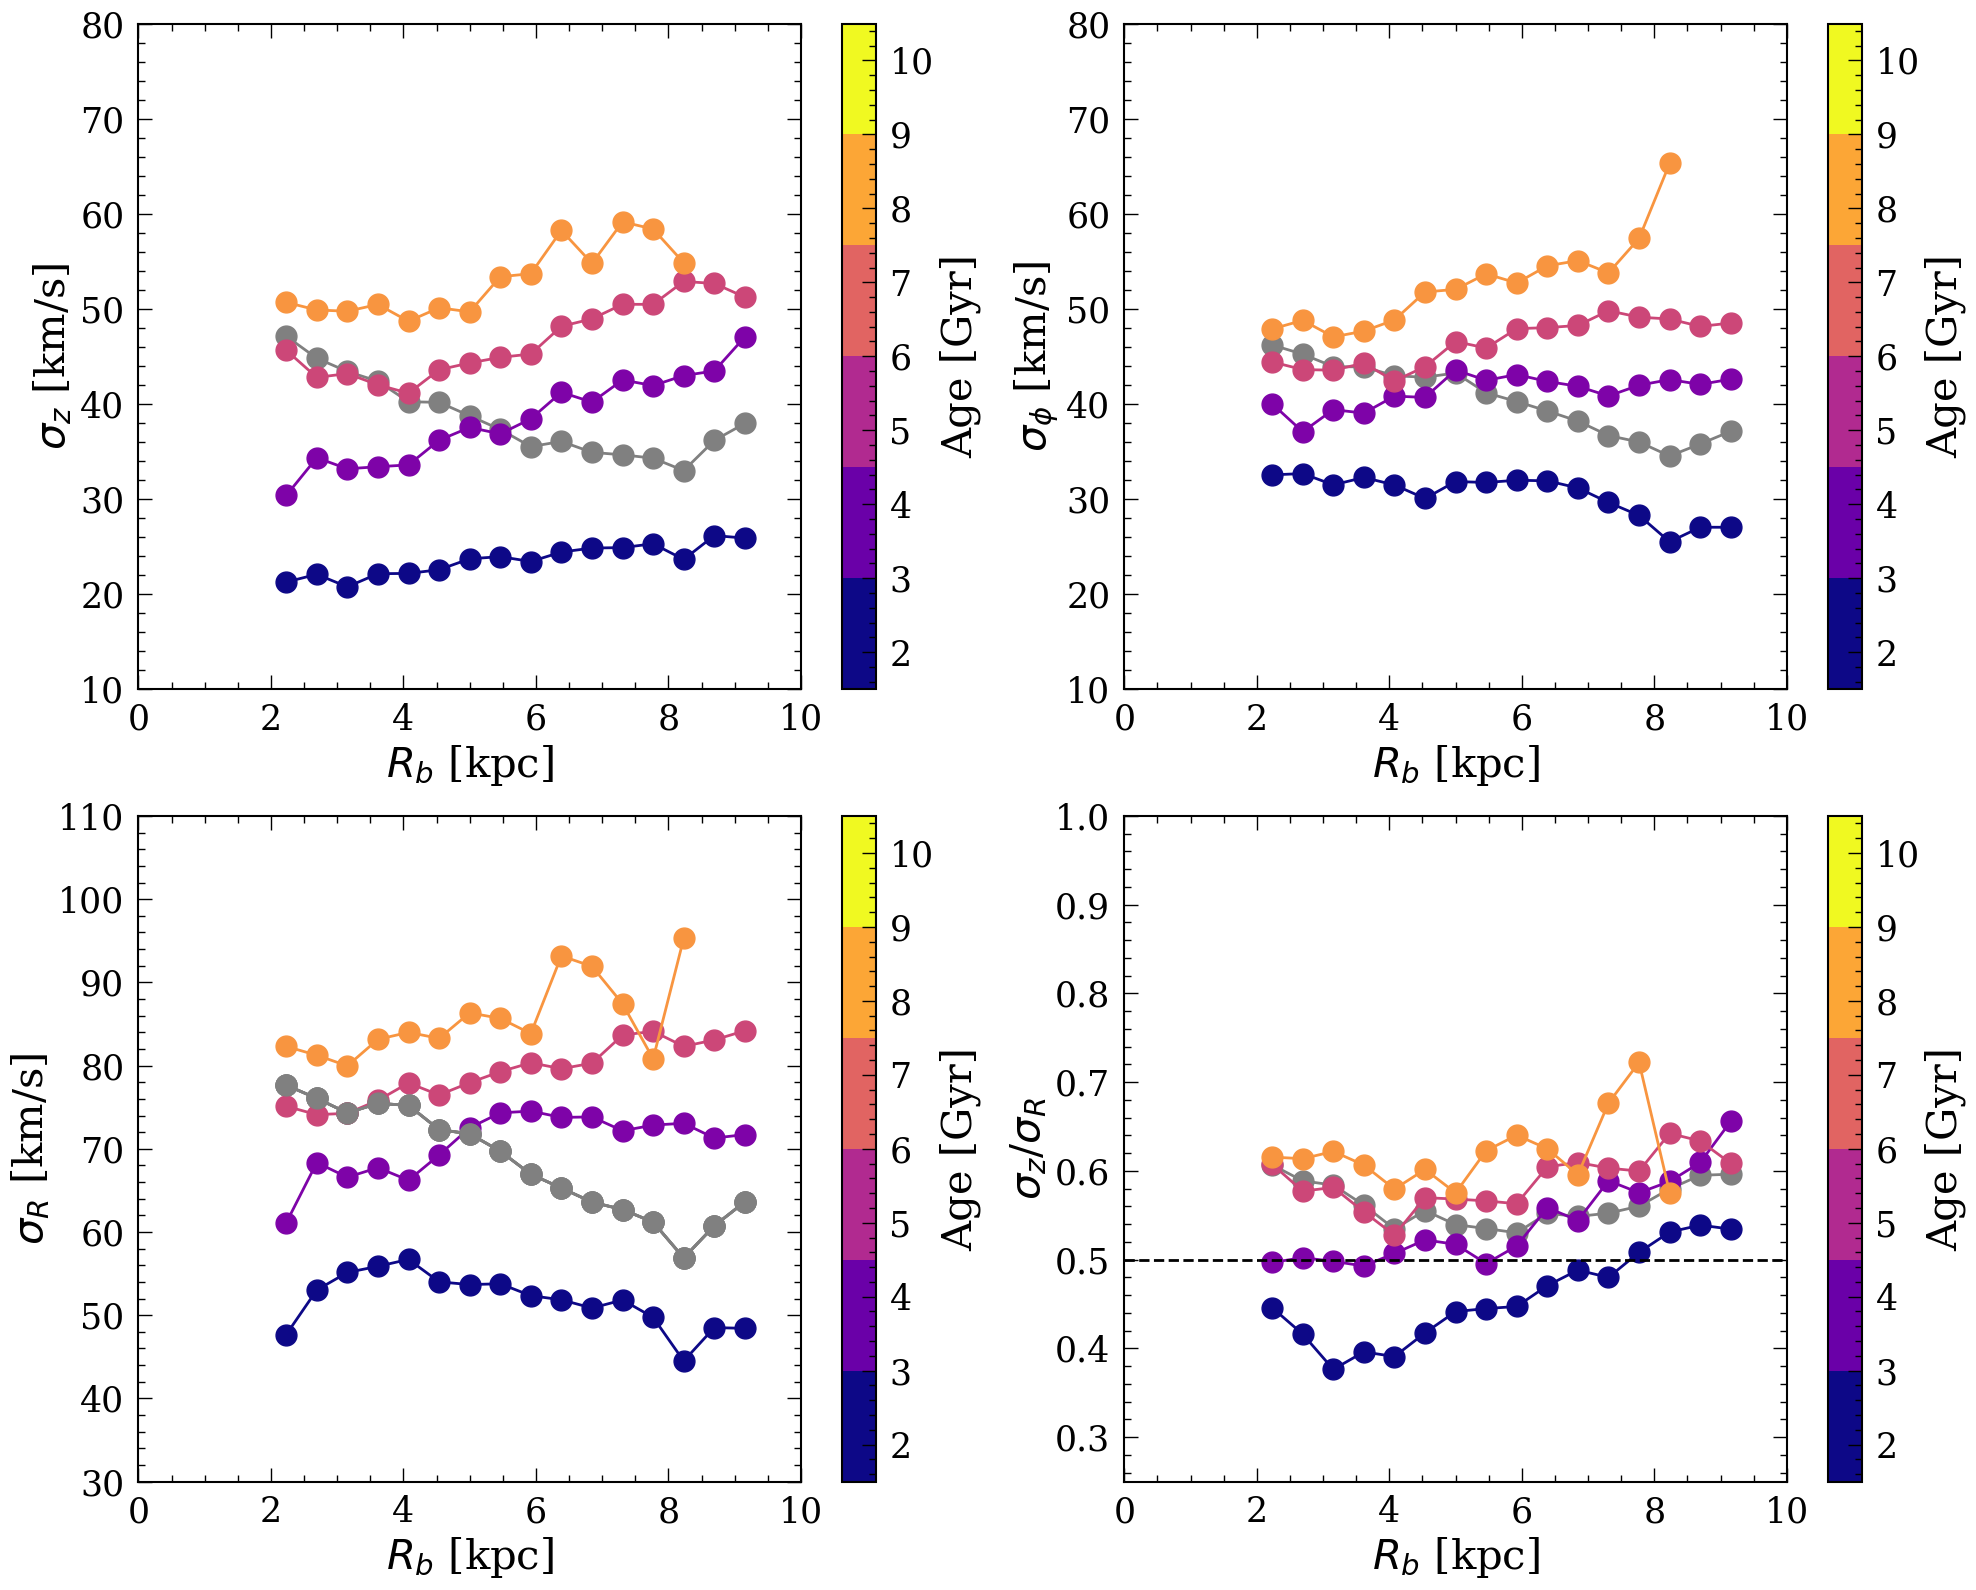

In [123]:

colors = getcolor(np.linspace(2,12,5))

plt.figure(figsize=(20,16))
plt.subplot(2,2,1)
plt.plot(ages, all_z, 'o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_z$ [km/s]')
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',6))
plt.ylim([10, 80])
plt.xlim([0,10])
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()


plt.subplot(2,2,2)
plt.plot(ages, all_phi, 'o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.plot(ages, avrs_phi[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_ϕ$ [km/s]')
plt.ylim([10, 80])
plt.xlim([0,10])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',6))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()



plt.subplot(2,2,3)
for i in range(len(rs)):
    plt.plot(ages, all_r, 'o-', color='grey', label='All',
            markersize=15)
    plt.plot(ages, avrs_r[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_R$ [km/s]')
plt.ylim([30, 110])
plt.xlim([0,10])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',6))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()



plt.subplot(2,2,4)
plt.plot(ages, all_z/all_r, 'o-', color='grey', label='All',
            markersize=15)
for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:]/avrs_r[i,:], 'o-', color=colors[i], label='Age = %.2f Gyr'%rs[i],
            markersize=15)
    plt.xlabel('$R_b$ [kpc]')
    plt.ylabel('$σ_z$/$σ_R$')
plt.ylim([0.25, 1])
plt.xlim([0,10])
plt.scatter(-100, -100, c=1, vmin=min(rs), vmax=max(rs), cmap=plt.get_cmap('plasma',6))
cb = plt.colorbar()
cb.set_label('Age [Gyr]')
#plt.legend()

plt.plot([0,16], [0.5,0.5], 'k--')



plt.tight_layout()

In [140]:
#sub['Rmean'] = (sub['R_PERI']+sub['R_APO'])/2

ages, rs, avrs_z, all_z = avr(sub_tryRb_sub_all['age'].values, sub_tryRb_sub_all['Rb'].values, 
                       sub_tryRb_sub_all['vz'].values, 
                     rbin=np.linspace(2,10,4), agebin=np.linspace(0,12,20))

ages, rs, avrs_phi, all_phi = avr(sub_tryRb_sub_all['age'].values, sub_tryRb_sub_all['Rb'].values, 
                         sub_tryRb_sub_all['vphi'].values, 
                     rbin=np.linspace(2,10,4), agebin=np.linspace(0,12,20))

ages, rs, avrs_r, all_r = avr(sub_tryRb_sub_all['age'].values, sub_tryRb_sub_all['Rb'].values, 
                       sub_tryRb_sub_all['vr'].values, 
                     rbin=np.linspace(2,10,4), agebin=np.linspace(0,12,20))


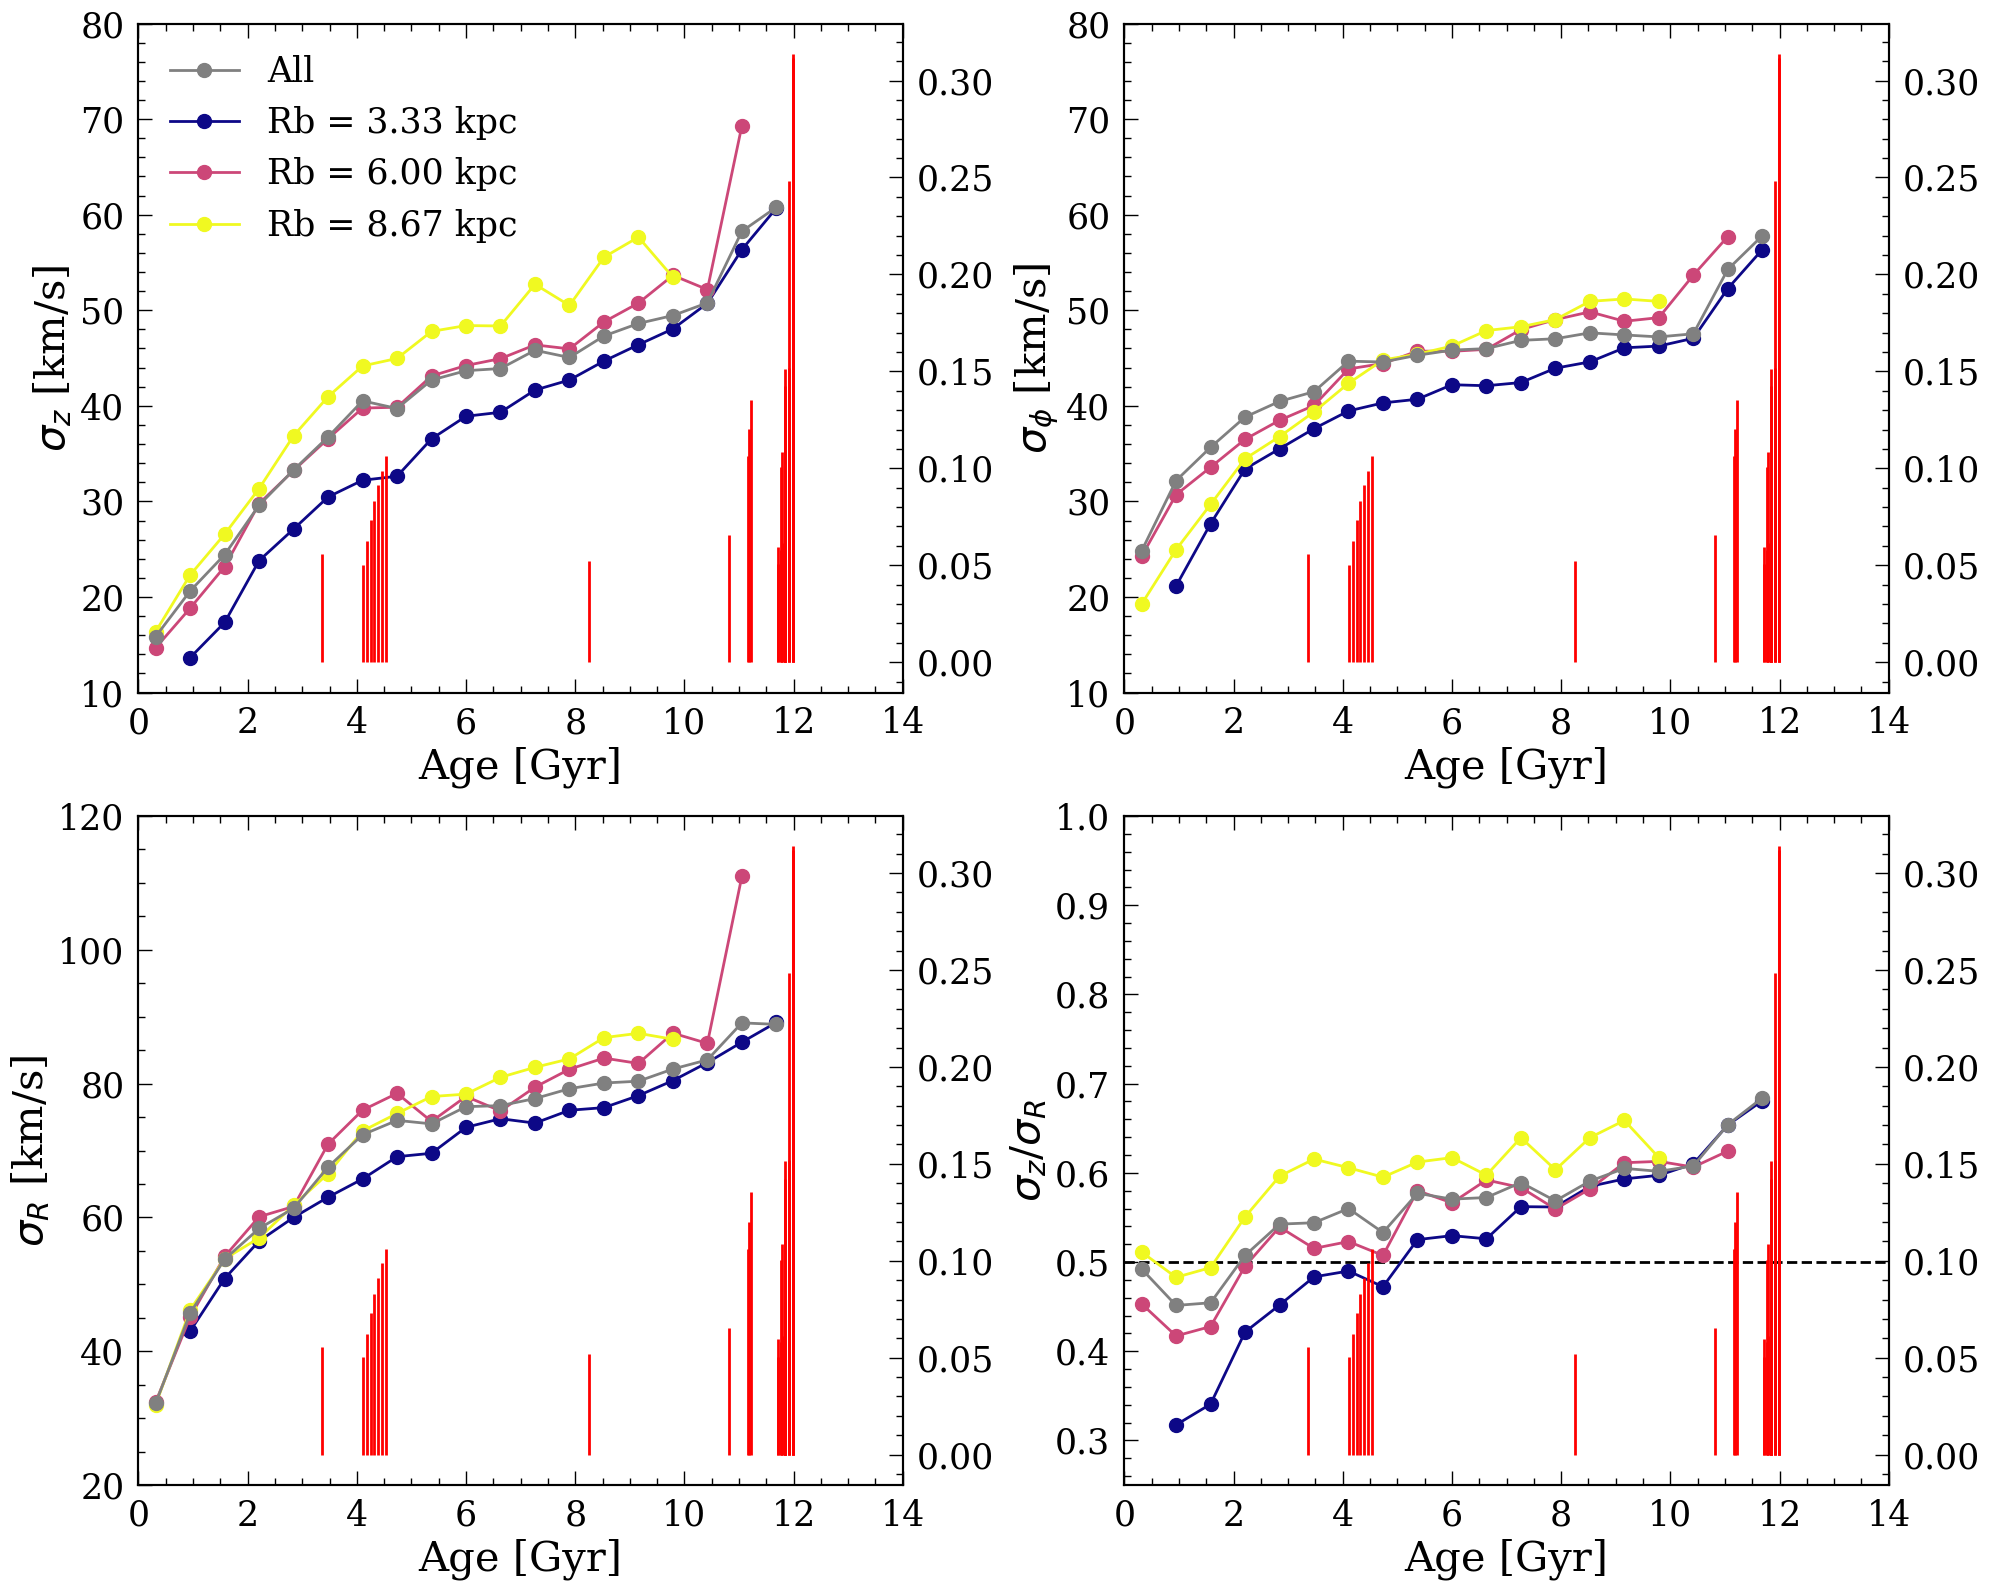

In [143]:


plt.figure(figsize=(20,16))
colors = getcolor(rs)

plt.subplot(2,2,1)
plt.plot(ages, all_z, 'o-', color='grey', label='All',
            markersize=10, zorder=11)
for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=10, zorder=10)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_z$ [km/s]')
plt.ylim([10, 80])
plt.xlim([0,14])
plt.legend(loc=2)
plt.twinx()
m = (merger['time']<12)&(merger['ratio']>0.05)
plt.vlines(merger['time'][m], 0, merger['ratio'][m], color='red', zorder=1)



plt.subplot(2,2,2)
plt.plot(ages, all_phi, 'o-', color='grey', label='All',
            markersize=10, zorder=11)
for i in range(len(rs)):
    plt.plot(ages, avrs_phi[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=10, zorder=10)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_ϕ$ [km/s]')
plt.ylim([10, 80])
plt.xlim([0,14])

plt.twinx()
plt.vlines(merger['time'][m], 0, merger['ratio'][m], color='red', zorder=1)



plt.subplot(2,2,3)
plt.plot(ages, all_r, 'o-', color='grey', label='All',
            markersize=10, zorder=11)
for i in range(len(rs)):
    plt.plot(ages, avrs_r[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=10, zorder=10)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_R$ [km/s]')
plt.ylim([20, 120])
plt.xlim([0,14])
plt.twinx()
plt.vlines(merger['time'][m], 0, merger['ratio'][m], color='red', zorder=1)



plt.subplot(2,2,4)
plt.plot(ages, all_z/all_r, 'o-', color='grey', label='All',
            markersize=10, zorder=11)
for i in range(len(rs)):
    plt.plot(ages, avrs_z[i,:]/avrs_r[i,:], 'o-', color=colors[i], label='Rb = %.2f kpc'%rs[i],
            markersize=10, zorder=10)
    plt.xlabel('Age [Gyr]')
    plt.ylabel('$σ_z$/$σ_R$')
plt.ylim([0.25, 1])
plt.xlim([0,14])
plt.plot([0,16], [0.5,0.5], 'k--')

plt.twinx()
plt.vlines(merger['time'][m], 0, merger['ratio'][m], color='red', zorder=1)

plt.tight_layout()







In [42]:
df = pd.read_csv('../NewGyroKineage/allGyroAge_GP.csv')

In [245]:
#df = df.loc[df['2agree']==1]
df.columns

Index(['source_id', 'teff_calc', 'Prot', 'gyroAge'], dtype='object')

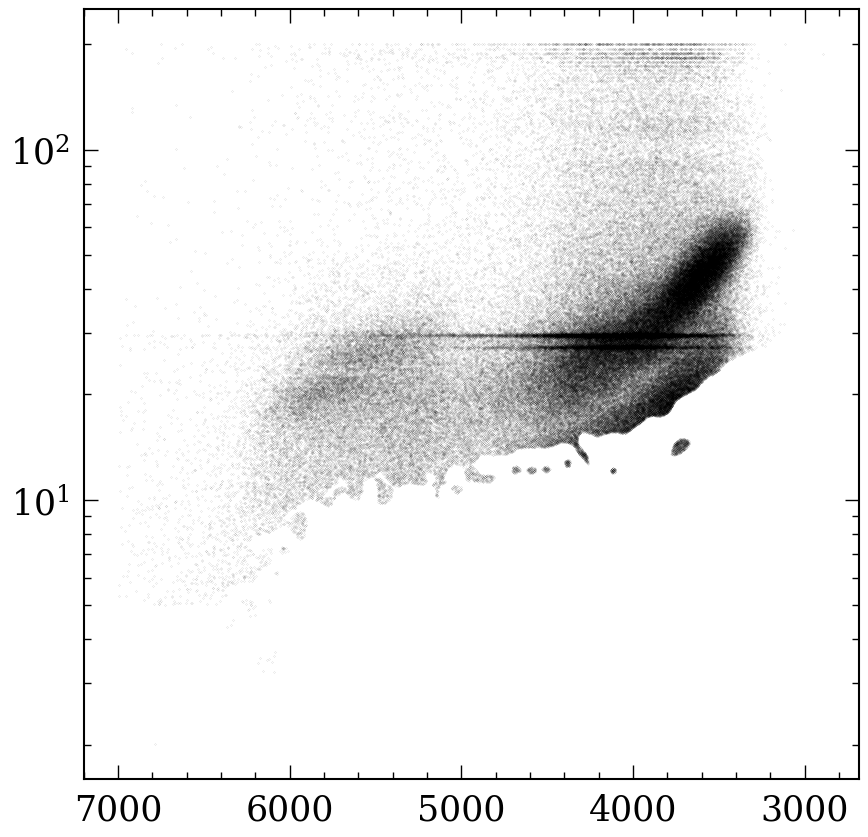

In [258]:
plt.semilogy(df['teff_calc'], df['Prot'], 'k.', markersize=0.1)
plt.gca().invert_xaxis()

<AxesSubplot:>

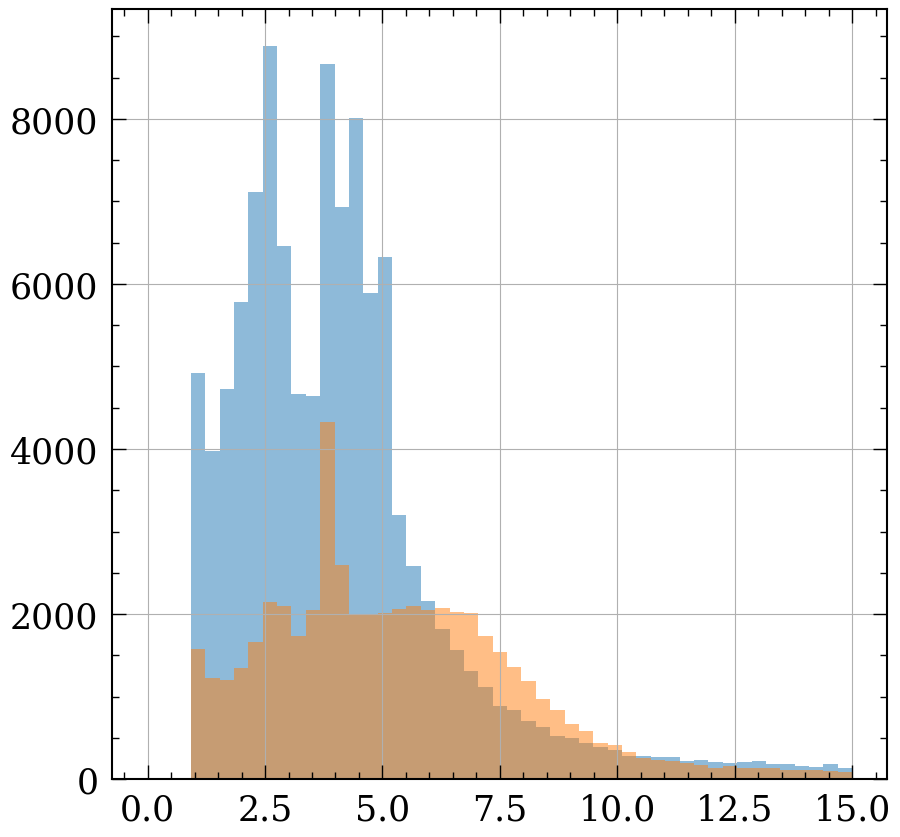

In [264]:
m = (df['teff_calc']>3800)
(df['gyroAge'][m]).hist(bins=np.linspace(0,15,50), alpha=0.5)
(df['gyroAge'][~m]).hist(bins=np.linspace(0,15,50), alpha=0.5)

In [38]:
apogee = readfits('allStar-1.0-apo25m.fits')

In [40]:
apogee.columns

Index(['pk', 'apogee_id', 'file', 'uri', 'starver', 'mjdbeg', 'mjdend',
       'telescope', 'apred_vers', 'healpix', 'snr', 'ra', 'dec', 'glon',
       'glat', 'jmag', 'jerr', 'hmag', 'herr', 'kmag', 'kerr', 'src_h',
       'targ_pmra', 'targ_pmdec', 'targ_pm_src', 'apogee_target1',
       'apogee_target2', 'apogee2_target1', 'apogee2_target2',
       'apogee2_target3', 'apogee2_target4', 'catalogid', 'gaiadr2_sourceid',
       'gaiadr2_plx', 'gaiadr2_plx_error', 'gaiadr2_pmra',
       'gaiadr2_pmra_error', 'gaiadr2_pmdec', 'gaiadr2_pmdec_error',
       'gaiadr2_gmag', 'gaiadr2_gerr', 'gaiadr2_bpmag', 'gaiadr2_bperr',
       'gaiadr2_rpmag', 'gaiadr2_rperr', 'sdssv_apogee_target0', 'firstcarton',
       'targflags', 'nvisits', 'ngoodvisits', 'ngoodrvs', 'starflag',
       'starflags', 'andflag', 'andflags', 'vrad', 'vscatter', 'verr',
       'vmederr', 'chisq', 'rv_teff', 'rv_tefferr', 'rv_logg', 'rv_loggerr',
       'rv_feh', 'rv_feherr', 'rv_ccpfwhm', 'rv_autofwhm', 'n_components',
 

In [46]:
gaia = pd.read_pickle('../NewGyroKineage/')
gaia

x                     y                     z  \
0        -8.3652773412055  0.018531285018203093  -0.25323590589137807   
1        -8.2273062823765  0.006424323829776786  -0.09489930248813565   
2      -8.427443712698919   0.02055840280820729   -0.3169405732553925   
3      -8.252352113622104  0.008657884443553978  -0.11951016672311861   
4      -8.212871691442134  0.008100041449571124  -0.08333145233387217   
...                   ...                   ...                   ...   
50304  -8.046810370882934    0.1612336111798532    0.1137235719922767   
50305  -8.079988650335906   0.09220012141885267    0.0730223359825535   
50306  -8.097795647845944  0.053676020165798935   0.05115519464235136   
50307  -8.070631252855225   0.11556139763407222   0.08654621115366777   
50308  -8.073847589715932   0.10875779566888542   0.07813364325876311   

                        vx                  vy                 vz_x  \
0       -46.80715001354713  153.28119978818756  -21.605419944314598   
1       1.4538256593955357  234.04605262592312  -0.8165363051075212   
2       -29.22538352452403  223.76878915788566   -21.49440446093907   
3        9.018395326556346    229.259839512492   1.9980893341608283   
4      -30.555874654162334  192.46785379687904    -9.37704204479786   
...                    ...                 ...                  ...   
50304   -1.266081339527347  245.01249728246736    7.683926272284386   
50305  -11.662027182396805  224.78455316604743   16.898734655484592   
50306  -12.215212063756361  224.30756522350404   -6.418640399288674   
50307   -10.86261154639644    243.301137518386  -2.4368859820283952   
50308   15.193649032305666  215.18903881034956    5.455378845217561   

               source_id_x      feh    teff_calc  KIC_x  ...  abs_G_rot  \
0          129540509376128  -0.8753  5742.079953    0.0  ...   0.672440   
1          171802987435264      nan  3650.438902    0.0  ...   0.137249   
2          216470647288448  -0.2857  5681.072401    0.0  ...   0.360156   
3          262959373305600   0.3348  4212.376339    0.0  ...  -0.073642   
4          305634168468480   0.2115  3843.826600    0.0  ...  -0.174207   
...                    ...      ...          ...    ...  ...        ...   
50304  4610962956390667648   0.0761  3632.598478    0.0  ...  -0.131903   
50305  4611088094557517056  -0.3115  3481.742092    0.0  ...   0.051835   
50306  4611092114646942336      nan  3445.896668    0.0  ...   0.066095   
50307  4611118983962580352   0.0004  3735.344137    0.0  ...   0.064927   
50308  4611265974923449984   0.0092  3749.319246    0.0  ...  -0.073596   

          teff_rot    vel_dis   kin_age  kin_age_cor          ra        dec  \
0      5742.079953   4.629501  1.016589     1.016589   44.699328   0.934104   
1      3650.438902  11.436199  2.290380     2.290380   45.594020   1.002269   
2      5681.072401  10.629860  2.682017     2.682017   45.299119   1.052634   
3      4212.376339  13.220936  3.080934     3.080934   45.872298   1.567217   
4      3843.826600  14.218829  3.547019     3.547019   44.034611   0.957140   
...            ...        ...       ...          ...         ...        ...   
50304  3632.598478   8.808509  1.322752     1.322752  268.072251  39.125742   
50305  3481.742092  11.619663  2.177899     2.177899  268.603203  39.490987   
50306  3445.896668  12.478598  2.469652     2.469652  268.659423  39.694763   
50307  3735.344137   8.201828  1.195431     1.195431  268.495086  39.994394   
50308  3749.319246  10.968006  2.174646     2.174646  270.705785  39.638073   

       kepid  source_id_y  bprp_dered  
0        NaN          NaN    0.830323  
1        NaN          NaN    2.216408  
2        NaN          NaN    0.850593  
3        NaN          NaN    1.562234  
4        NaN          NaN    1.945972  
...      ...          ...         ...  
50304    NaN          NaN    2.242601  
50305    NaN          NaN    2.467234  
50306    NaN          NaN    2.521607  
50307    NaN          NaN    2.093799  
5030

In [48]:
list1 = [1,2]
list1.append([4,5])

In [49]:
list1

[1, 2, [4, 5]]

In [56]:
m = np.array([False,True,True,False,False], dtype=bool)
np.array(range(5))[m]

array([1, 2])

In [54]:
np.array(range(5))

array([0, 1, 2, 3, 4])